
##**Introduction**
In the dynamic realm of technology, staying releveant of the latesttrends and understanding the diverse landscape of developer preferences and practices is essential. The Stack Overflow Annual Developer Survery serves as a valuable window into the world of developers, capturing insights from their favorite technologies to job preferences. In the eighth edition of the survey conducted in January 2018, a record-breaking 100,000 developers participated, making it the most extensive survey to date. These responses are meticulously orgainzed into two main tables: **survey_results_public**, housing responses, one respondent per row, and survey_results_schema, providing a detailed schema for each column.

This year's survey ventured into uncharted territories, exploring new topics such as artificial intelligence and ethics in coding. The survey also aimed to shed light on the representation of underrepresented groups in the tech industry. Remarkably, the survey revealed a concerning trend: underrepresented groups participated at even lower rates than anticipated, underscoring the need for inclusive insights in the tech world.

Within the realm of these 98,855 qualified responses, we delve into the nuances of developer preferences, salaries, machine learning, and diversity in tech. Approximately 67,441 respondents completed the entre survey, forming the core of our analytical exploration. Through this EDA, we aim to uncover patterns, correlations, and meaningful narratives within this rich dataset. Join us on this journey to decipher the intricacies of the developer community and glean valuable insights of the tech world of 2018.

Link: https://www.kaggle.com/datasets/stackoverflow/stack-overflow-2018-developer-survey/data

##**Load packages**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns

##**Read the data**

In [ ]:
data_df = pd.read_csv("/content/survey_results_public.csv")
schema_df = pd.read_csv("/content/survey_results_schema.csv")



<ipython-input-121-726ebbf98dcc>:1: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv("/content/survey_results_public.csv")


##**Check the data**
Let's check the dataset rows and column numbers

In [ ]:
print("Stack Overflow 2018 Developer Survey Data - rows:", data_df.shape[0], ", columns:", data_df.shape[1])

Stack Overflow 2018 Developer Survey Data - rows: 98855 , columns: 129


There are **49,489** data rows and **129** columns.

In [ ]:
print("Stack Overflow 2018 Developer Survey schema - rows:", schema_df.shape[0], ", columns:", schema_df.shape[1])

Stack Overflow 2018 Developer Survey schema - rows: 129 , columns: 2


The schema dataset contains **129** rows, each row will explain one column from the main dataset.

##**Glimpse the data**
We start by looking to the data features (first 5 rows).

In [ ]:
data_df.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


##**Data exploration**

#**Demographics**


##1. What is the distribution of respondents based on age, gender, and country?

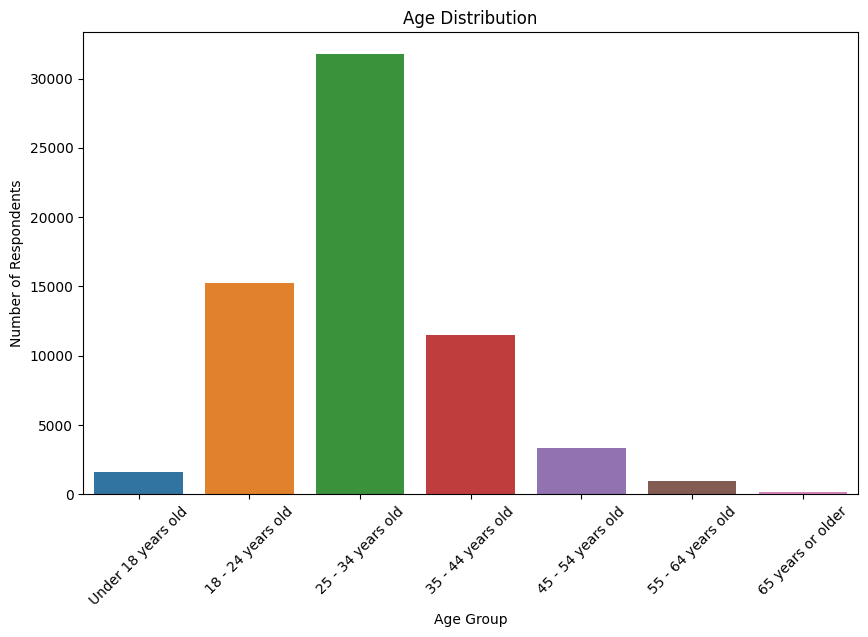

In [ ]:
# Define the order of age groups
age_group_order = [
    "Under 18 years old",
    "18 - 24 years old",
    "25 - 34 years old",
    "35 - 44 years old",
    "45 - 54 years old",
    "55 - 64 years old",
    "65 years or older"
]

# Create an ordered categorical variable for Age Group
data_df['Age'] = pd.Categorical(data_df['Age'], categories=age_group_order, ordered=True)

# Count the number of respondents in each age group
age_group_counts = data_df['Age'].value_counts().reindex(age_group_order)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, order=age_group_order)
plt.xticks(rotation=45)
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.title('Age Distribution')
plt.show()

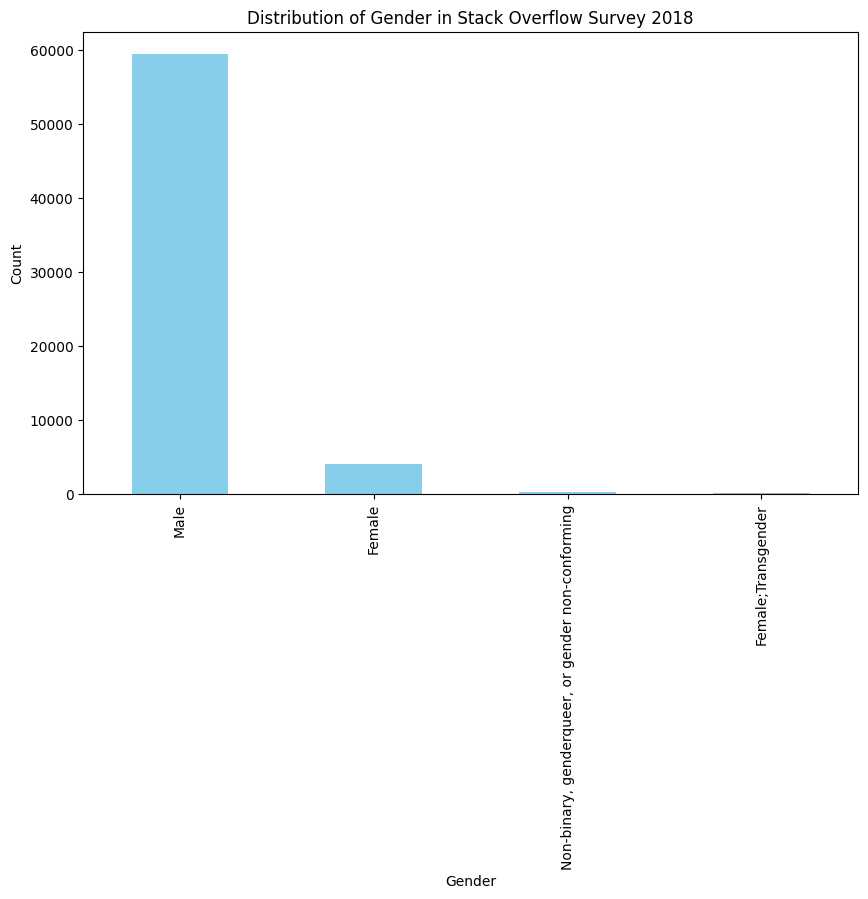

In [ ]:
#Select the 'Gender' Column
gender_data = data_df['Gender']

#Check unique values and their counts
gender_counts = gender_data.value_counts()

#Plot the distribution
plt.figure(figsize=(10, 6))
gender_counts[:4].plot(kind='bar', color='skyblue')
plt.title('Distribution of Gender in Stack Overflow Survey 2018')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

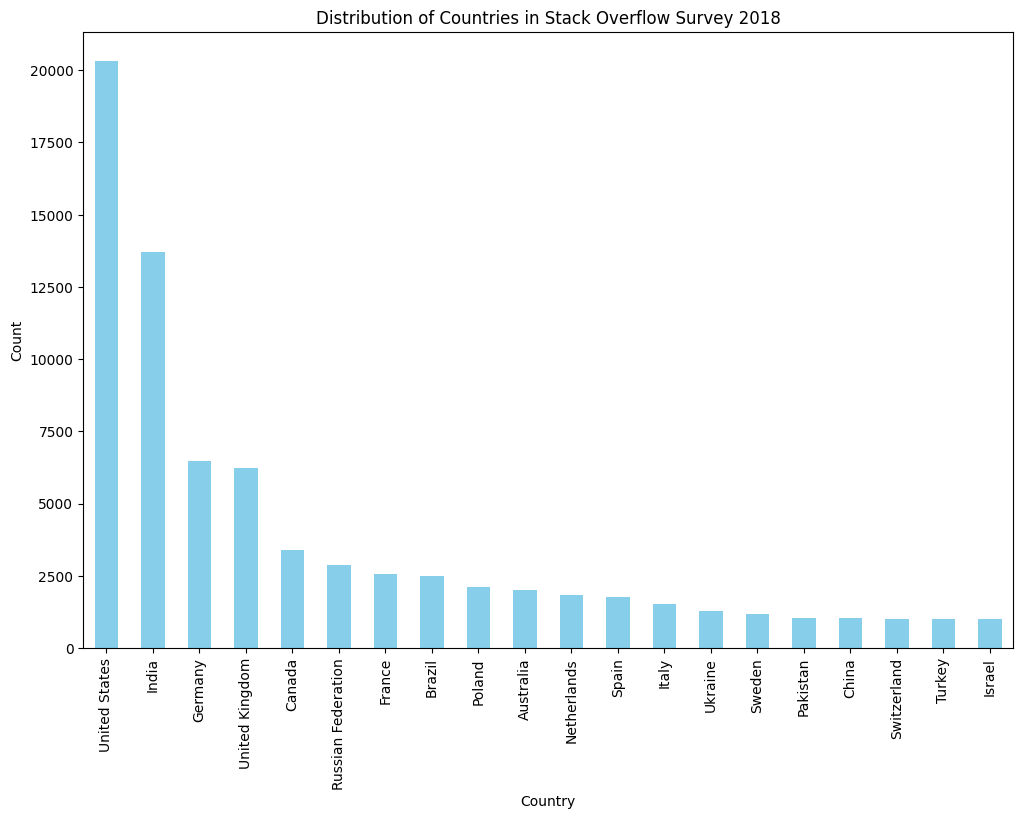

In [ ]:
#Select the 'Country' column
country_data = data_df['Country']

#Check unique values and their counts
country_counts = country_data.value_counts()

#Plot the distribution
plt.figure(figsize=(12,8))
country_counts[:20].plot(kind='bar', color='skyblue')
plt.title('Distribution of Countries in Stack Overflow Survey 2018')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()


##2. What are the most common formal education levels among respondents?

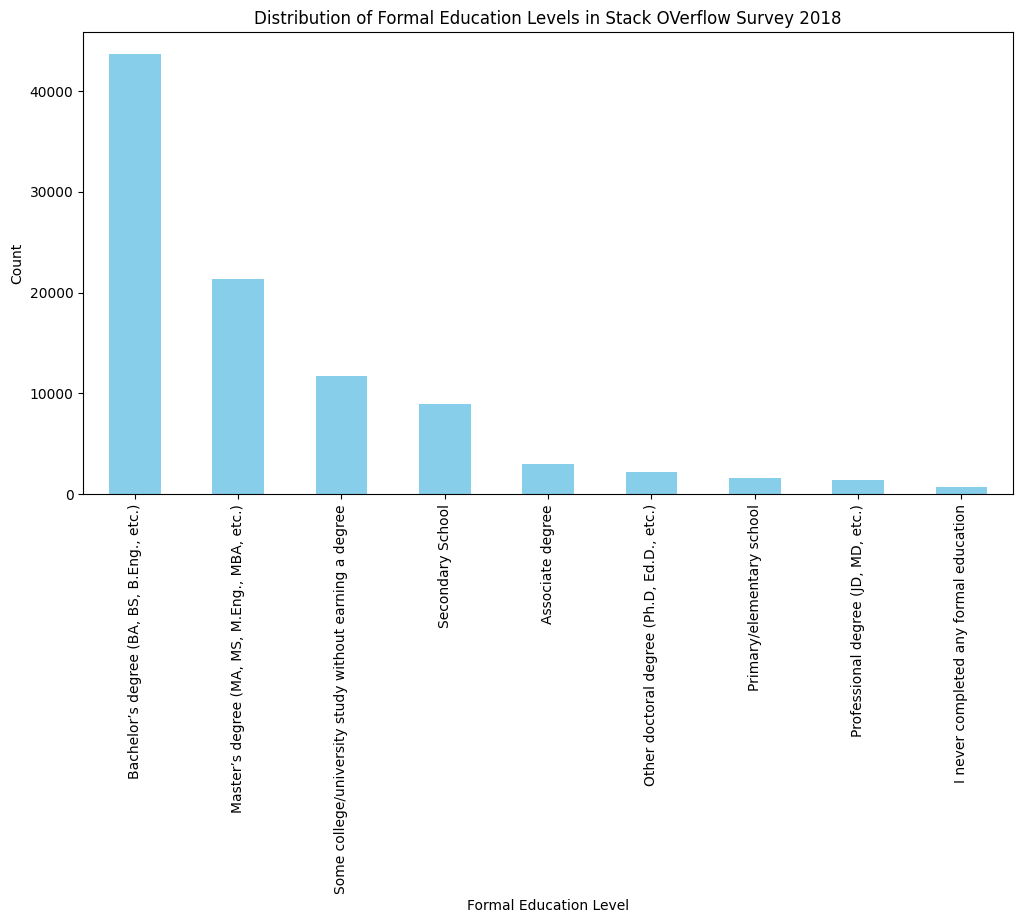

In [ ]:
#Rename the specific category in 'FormalEducation'
data_df['FormalEducation'] = data_df['FormalEducation'].replace('Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)', 'Secondary School')

#Select the 'FormalEducation' column
education_data = data_df['FormalEducation']

#Check unique values and their counts
education_counts = education_data.value_counts()

#Plot the distribution
plt.figure(figsize=(12, 6))
education_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Formal Education Levels in Stack OVerflow Survey 2018')
plt.xlabel('Formal Education Level')
plt.ylabel('Count')
plt.show()

Looking at the distribution of formal education levels from above, we see that the most common formal education level is a Bachelor's degree, with a Master's degree second and some college/university study without earning a degree as third.

##3. What is the distribution of professional coding experience among respondents?

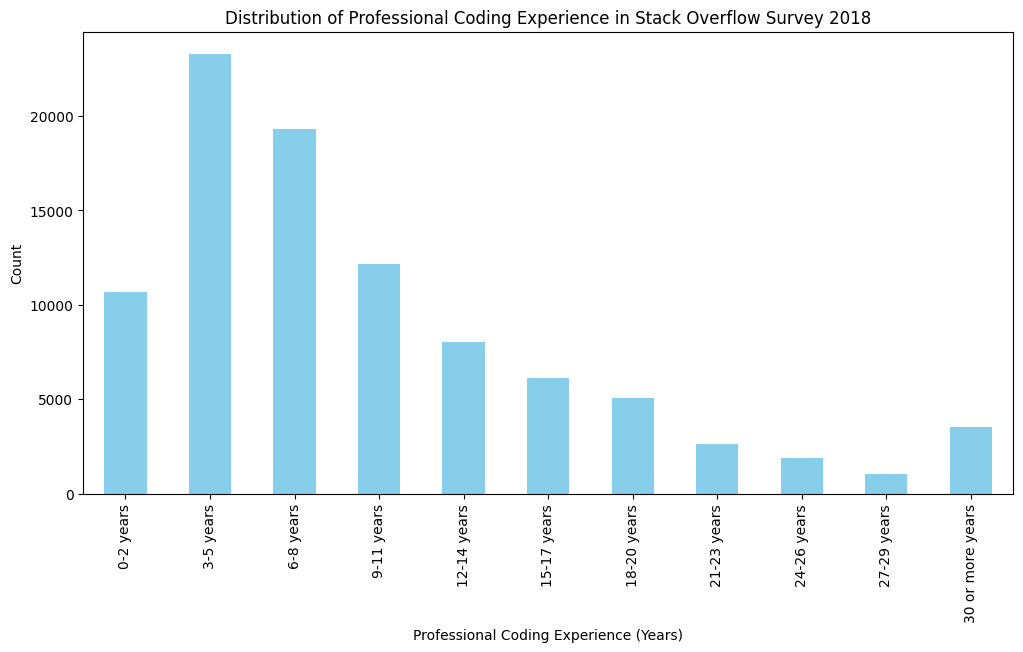

In [ ]:
# Select the 'YearsCoding' column
coding_experience_data = data_df['YearsCoding']

# Define the logical order of coding experience
experience_order = [
    '0-2 years', '3-5 years', '6-8 years', '9-11 years',
    '12-14 years', '15-17 years', '18-20 years', '21-23 years',
    '24-26 years', '27-29 years', '30 or more years'
]

# Check unique values and their counts
coding_experience_counts = coding_experience_data.value_counts()

# Order the index for proper visualization
coding_experience_counts_sorted = coding_experience_counts.loc[experience_order]

# Plot the distribution
plt.figure(figsize=(12, 6))
coding_experience_counts_sorted.plot(kind='bar', color='skyblue')
plt.title('Distribution of Professional Coding Experience in Stack Overflow Survey 2018')
plt.xlabel('Professional Coding Experience (Years)')
plt.ylabel('Count')
plt.show()


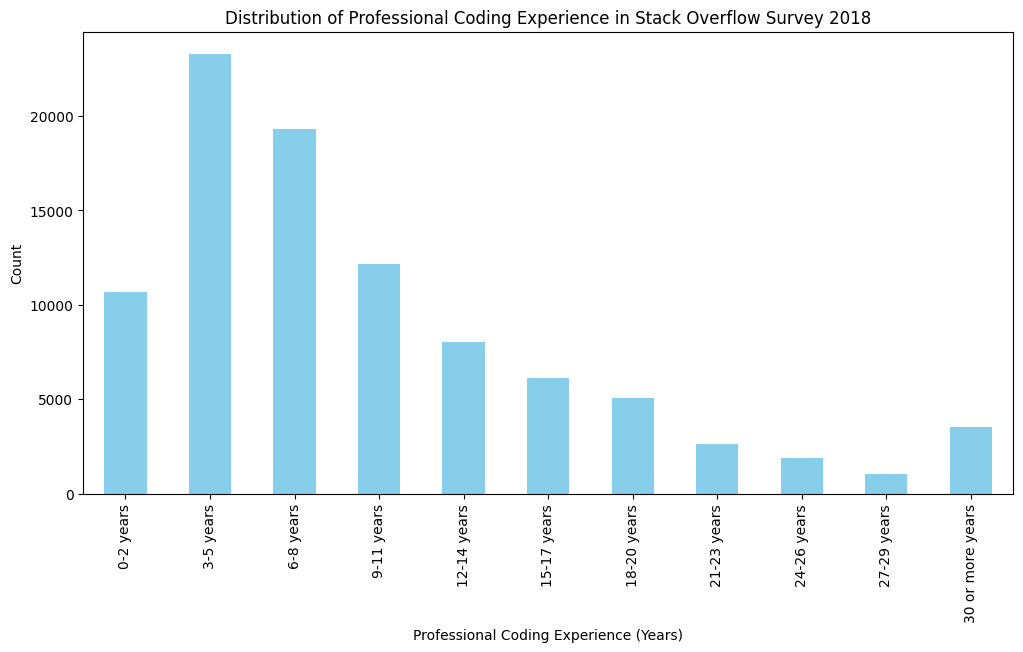

In [ ]:
#Select the 'YearsCodingProf' column
coding_experience_data = data_df['YearsCoding']

#Check unique values and their counts
coding_experience_counts = coding_experience_data.value_counts()

#Order the index for proper visualization
order = ['0-2 years', '3-5 years', '6-8 years', '9-11 years', '12-14 years', '15-17 years', '18-20 years', '21-23 years', '24-26 years', '27-29 years', '30 or more years']

# Plot the distribution
plt.figure(figsize=(12, 6))
coding_experience_counts.loc[order].plot(kind='bar', color='skyblue')
plt.title('Distribution of Professional Coding Experience in Stack Overflow Survey 2018')
plt.xlabel('Professional Coding Experience (Years)')
plt.ylabel('Count')
plt.show()

Notice that the distribution of coding experience (general) and professional coding experience are very similar. A majority of respondents to the survey had 3-5 years of coding experience, with 6-8 years second, and 9-11 years third.

> Indented block



##4. How does job satisfaction vary across different demographics?

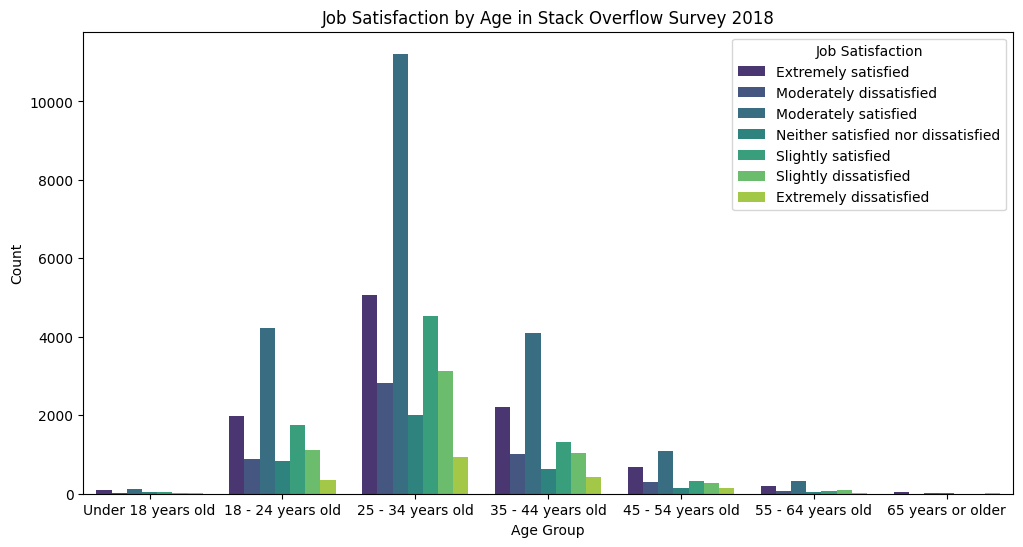

In [ ]:
#Select relevant columns
selected_columns = ['JobSatisfaction', 'Age']

#Filter out rows where JobSatisfaction is not specified
filtered_data = data_df[selected_columns].dropna(subset=['JobSatisfaction'])

#Plot the distribution
plt.figure(figsize=(12,6))
sns.countplot(x='Age', hue='JobSatisfaction', data=filtered_data, palette='viridis')
plt.title('Job Satisfaction by Age in Stack Overflow Survey 2018')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Job Satisfaction')
plt.show()

We see that for a majority of age groups, developers are mostly moderately satisfied with their jobs.

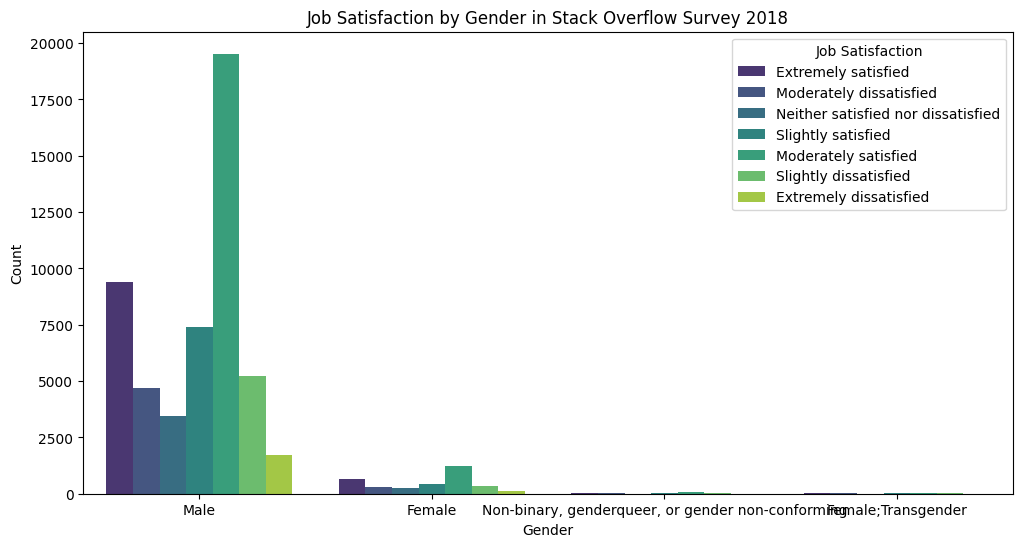

In [ ]:
#Select relevant columns
selected_columns = ['JobSatisfaction', 'Gender']

#Filter out rows where JobSatisfaction is not specified
filtered_data = data_df[selected_columns].dropna(subset=['JobSatisfaction'])

#Get the top 4 genders
top_genders = filtered_data['Gender'].value_counts().index[:4]

#Filter the data for the top 4 genders
filtered_data_top_genders = filtered_data[filtered_data['Gender'].isin(top_genders)]

#Plot the distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Gender', hue='JobSatisfaction', data=filtered_data_top_genders, palette='viridis')
plt.title('Job Satisfaction by Gender in Stack Overflow Survey 2018')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Job Satisfaction')
plt.show()

Notice that both males and females have similar distributions for job satisfaction. For both genders, respondents are mostly moderately satisfied, extremely satisfied, and slightly satisfied, in that order.

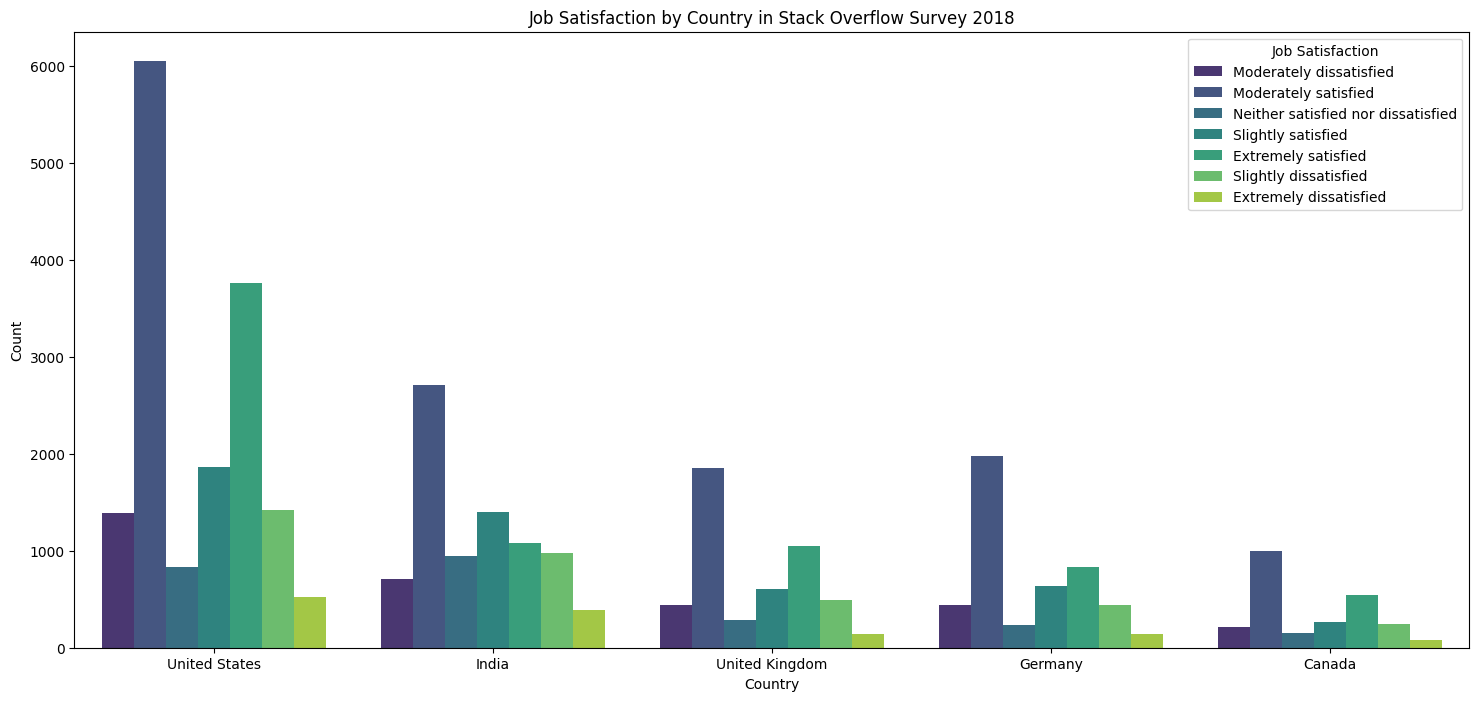

In [ ]:
#Select relevant columns
selected_columns = ['JobSatisfaction', 'Country']

#Filter out rows where JobSatisfaction is not specified
filtered_data = data_df[selected_columns].dropna(subset='JobSatisfaction')

#Get the top 5 countries groups
top_countries = filtered_data['Country'].value_counts().index[:5]

#Filter the data for the top 5 countries
filtered_data_top_countries = filtered_data[filtered_data['Country'].isin(top_countries)]

#Plot the distribution
plt.figure(figsize=(18, 8))
sns.countplot(x='Country', hue='JobSatisfaction', data=filtered_data_top_countries,
              order=top_countries, palette='viridis')
plt.title('Job Satisfaction by Country in Stack Overflow Survey 2018')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Job Satisfaction')
plt.show()

We see similar distributions of job satisfaction among the top 5 countries. A majority of respondents are moderately satisfied, extremely satisfied, and slightly satisfied, respectively.

##Employment and Career Questions





##1. What is the distribution of employment types (full_time, part-time, freelance, etc.) among developers?

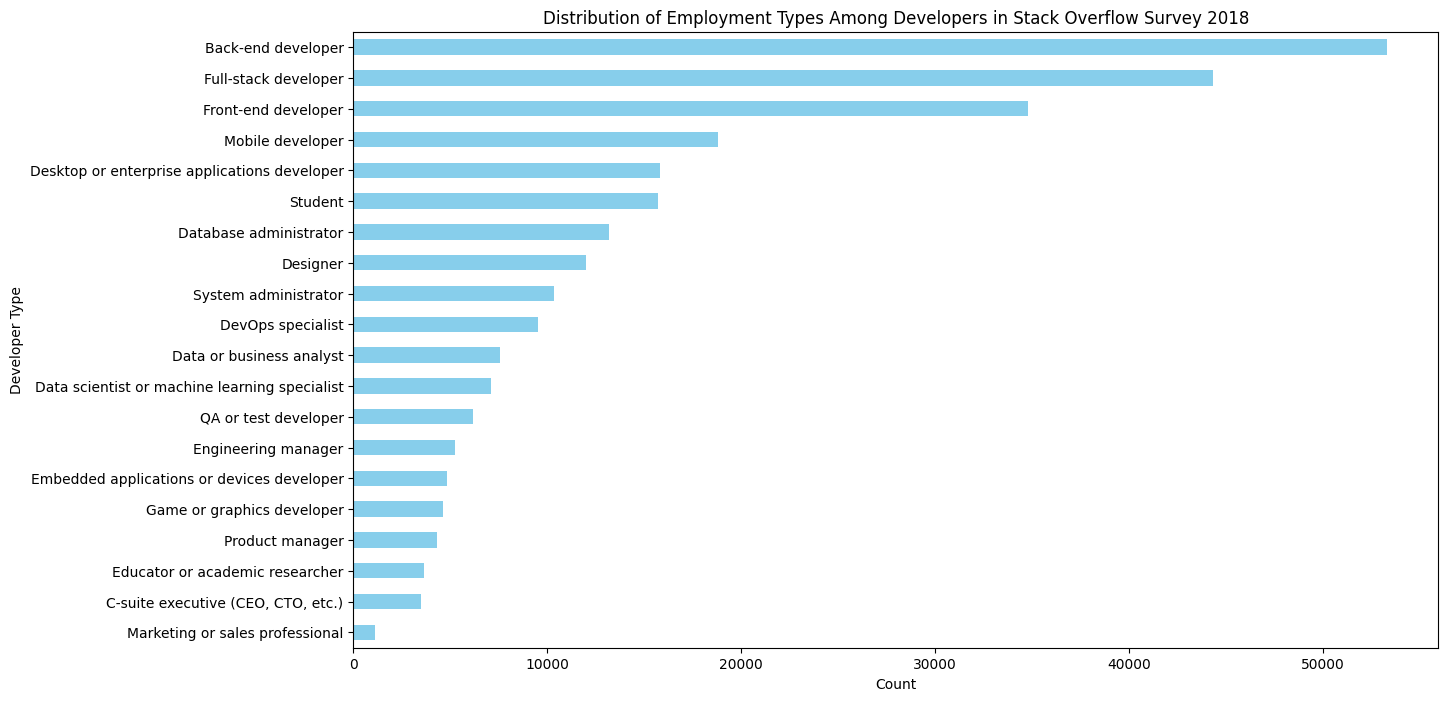

In [ ]:
#Select the 'DevType' column
dev_type_data = data_df['DevType']

#Split the entries in 'DevType' since each respondent can have multiple roles
dev_types = dev_type_data.str.split(';')

#Create dummy colums for each developer type
dev_types_dummies = dev_type_data.str.get_dummies(';')

#Sum the dummy columns to get the count for each developer type
dev_types_counts = dev_types_dummies.sum()

#Plot the distribution
plt.figure(figsize=(14, 8))
dev_types_counts.sort_values().plot(kind='barh', color='skyblue')
plt.title('Distribution of Employment Types Among Developers in Stack Overflow Survey 2018')
plt.xlabel('Count')
plt.ylabel('Developer Type')
plt.show()

The analysis of employment types among developers in the Stack Overflow Survey reveals a prominent preference for back-end development roles, as indicated by the highest count of respondents identifying as back-end developers. Full-stack developers come in second place, showcasing a significant representation across the developer community. Interestingly, front-end developers closely follow full-stack developers, suggesting a balanced distribution between those engaged in both front-end and back-end development. This result highlights the diverse roles that developers occupy, with a substantial focus on the foundational aspects of back-end development.

##2. What are the most popular programming languages, frameworks, and technologies among developers?




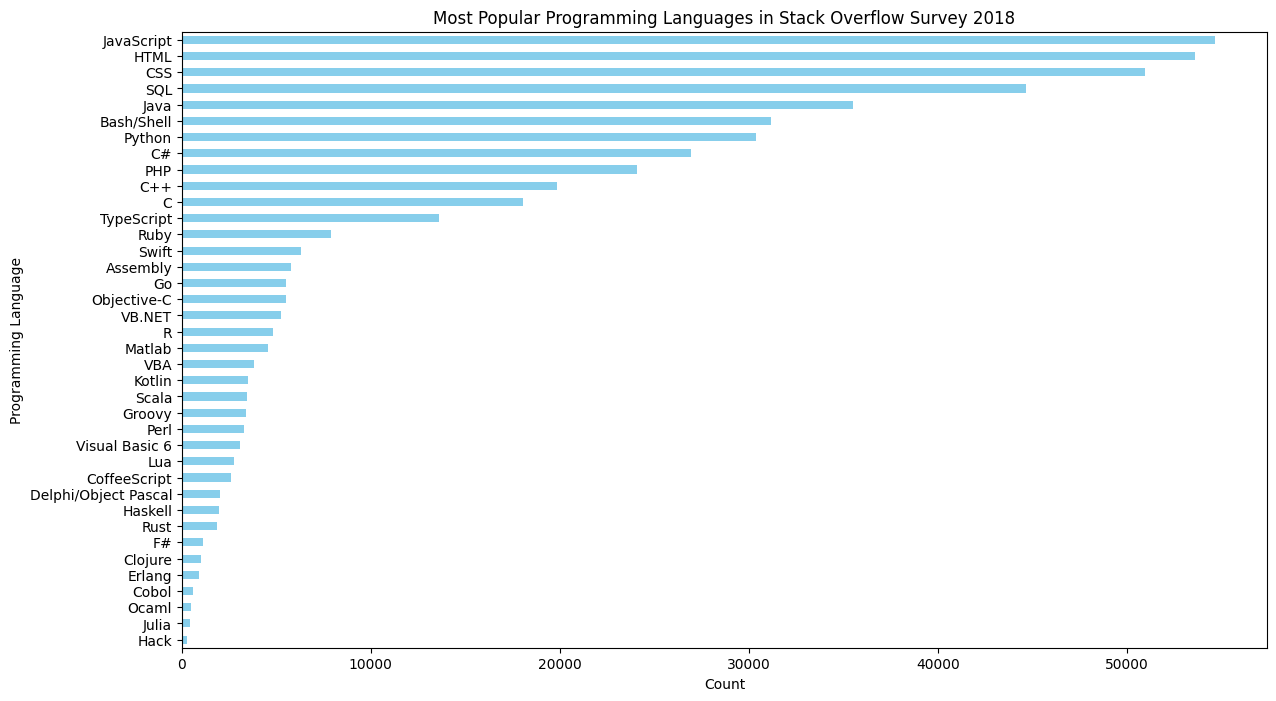

In [ ]:
#Select the 'LanguageWorkedWith' column
languages_data = data_df['LanguageWorkedWith']

#Split the entries in 'LanguageWorkedWith'
languages = languages_data.str.split(';')

#Create dummy columns for each programming language
language_dummies = languages_data.str.get_dummies(';')

#Sum the dummy columns tog et the count for each programming language
language_counts = language_dummies.sum()

#Plot the distribution for the top 10 languages
plt.figure(figsize=(14, 8))
language_counts.sort_values().plot(kind='barh', color='skyblue')
plt.title('Most Popular Programming Languages in Stack Overflow Survey 2018')
plt.xlabel('Count')
plt.ylabel('Programming Language')
plt.show()

The analysis of programming languages worked with the Stack Overflow survey reveals a prodominant usage of JavaScript, indicating its widespread adoption among developers. HTML and CSS closely follow as the second and third most popular langages, respectively, emphasizing the integral role of these front-end technologies in the development landscape. This distribution underscores the importance of web technologies, with JavaScript leading the way in shaping the digital landscape, closely accompanied by foundational languages for development.

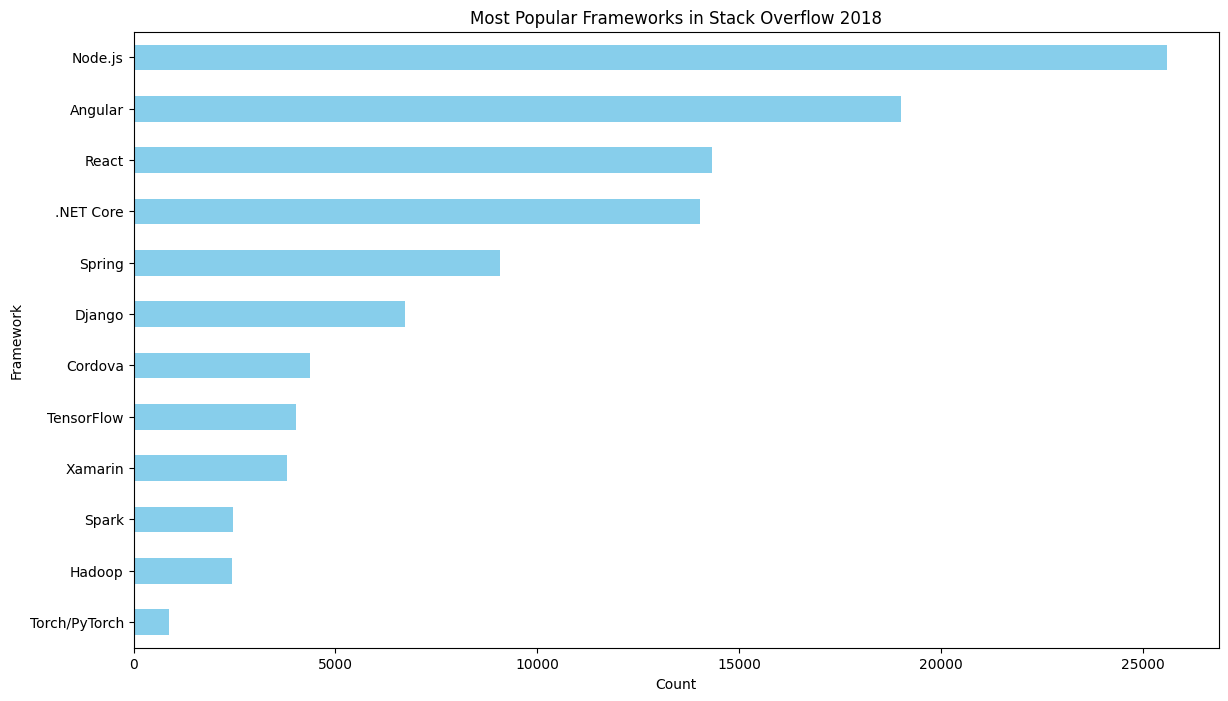

In [ ]:
#Select the 'FrameworkWorkedWith' column
frameworks_data = data_df['FrameworkWorkedWith']

#Remove rows with 'NA' in the 'FrameworkWorkedWith' column
frameworks_data = frameworks_data[frameworks_data != 'NA']

#Split the entries in 'FrameworkWorkedWith
frameworks = frameworks_data.str.split(';')

#Create dummy columns for each framework
frameworks_dummies = frameworks_data.str.get_dummies(';')

#Create dummy columns for each framework
frameworks_counts = frameworks_dummies.sum()

#Plot the distribution for all frameworks
plt.figure(figsize=(14, 8))
frameworks_counts.sort_values().plot(kind='barh', color='skyblue')
plt.title('Most Popular Frameworks in Stack Overflow 2018')
plt.xlabel('Count')
plt.ylabel('Framework')
plt.show()

The examination of frameworks worked with in the Stack Overflow Survey underscores the prominent role of Node.js, emerging as the most utilized framework among developers. Angular and React closely follow, reflecting the strong adoption of these JavaScript-based frameworks, particulary in the context of web development. This distribution highlights the continued significance of server-side JavaScript with Node.js and the enduring popularity of front-end development frameworks like Angular and React within the developer commmunity.

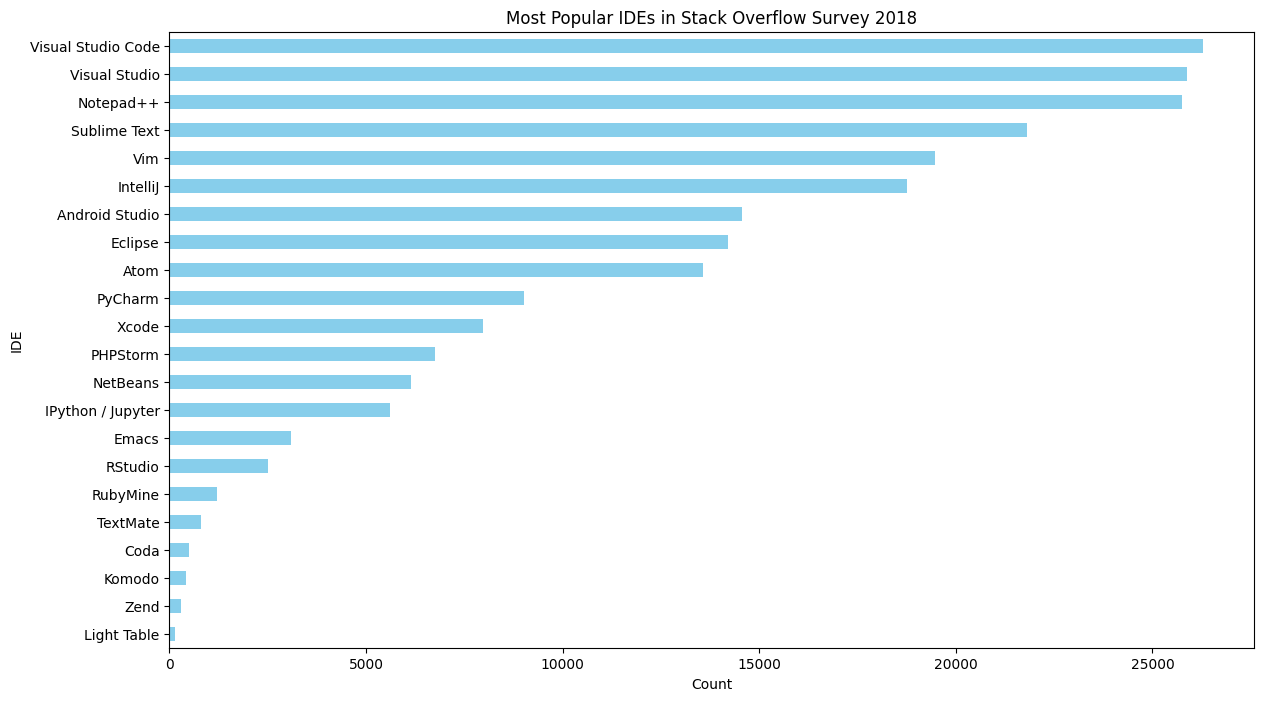

In [ ]:
#Select the 'IDE' column
ides_data = data_df['IDE']

#Remove rows with 'NA' in the 'IDE' column
ides_data = ides_data[ides_data != 'NA']

#Split the entries in 'IDE'
ides = ides_data.str.split(';')

#Create dummy columns for each IDE
ides_dummies = ides_data.str.get_dummies(';')

#Sum the dummy columns to get the count for each IDE
ides_count = ides_dummies.sum()

#Plot the distribution for all IDES
plt.figure(figsize = (14, 8))
ides_count.sort_values().plot(kind='barh', color='skyblue')
plt.title('Most Popular IDEs in Stack Overflow Survey 2018')
plt.xlabel('Count')
plt.ylabel('IDE')
plt.show()

The analysis of Integrated Development Environments (IDEs) in the Stack Overflow survey highlights Visual Studio Code as the most widely adopted choice among developers, indicating its popularity for coding tasks. Following closely, Visual Studio and Notepad++ secure prominent, emphasizing the diverse preferences for developmen environments. The inclusion of Sublime Text in the top selections further underscores the varied toolsets employed by developers, showcasing a mix of feature-rich IDES and lightweight editors in the coding system.

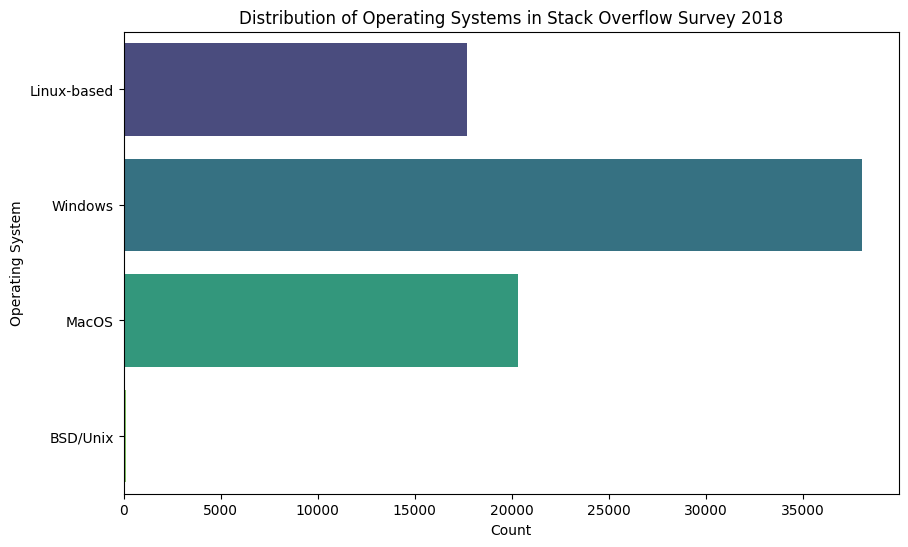

In [ ]:
# Select the 'OperatingSystem' column
os_data = data_df['OperatingSystem']

# Remove rows with 'NA' in the 'OperatingSystem' column
os_data = os_data[os_data != 'NA']

# Convert the Series to a DataFrame with a column named 'OperatingSystem'
os_data_df = pd.DataFrame({'OperatingSystem': os_data})

# Plot the distribution for all operating systems
plt.figure(figsize=(10, 6))
sns.countplot(y='OperatingSystem', data=os_data_df, palette='viridis')
plt.title('Distribution of Operating Systems in Stack Overflow Survey 2018')
plt.xlabel('Count')
plt.ylabel('Operating System')
plt.show()

The examination of operating systems in the Stack Overflow survey reveals Windows as the overwhelmingly dominant choice among developers, securing the first position in adoption. MacOS follows as the second more prevalent operating system, reflecting the substantial presence of developers in the Apple ecosystem. Linus-based operating systems, encompassing various distribution, secured the third spot, underscoring the enduring popularity and preference for open-source platforms within the developer community.

##3. What is distribution of company sizes where respondents work?

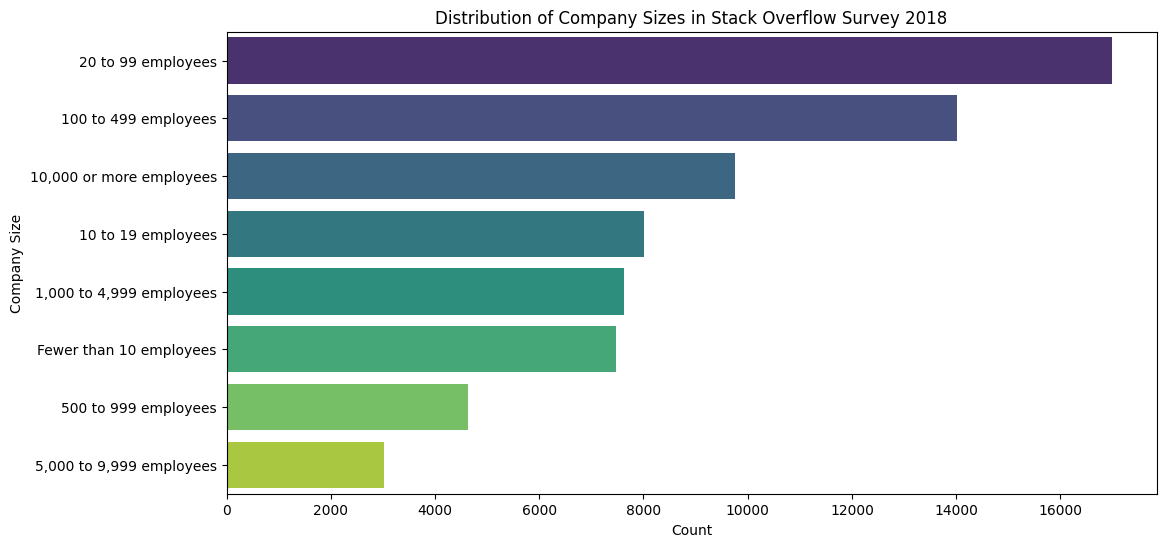

In [ ]:

# Select the 'CompanySize' column
company_size_data = data_df['CompanySize']

# Plot the distribution for all company sizes
plt.figure(figsize=(12, 6))
sns.countplot(y='CompanySize', data=data_df, order=data_df['CompanySize'].value_counts().index, palette='viridis')
plt.title('Distribution of Company Sizes in Stack Overflow Survey 2018')
plt.xlabel('Count')
plt.ylabel('Company Size')
plt.show()


The examination of company sizes in the Stack Overflow survey indicates a predominant presence of small to medium-sized enterprises, with '20 to 99 employees' emerging as the most common company size among respondents. Following closely, '100 to 499 employees' secures the second position, highlighting a significant representation of mid-sized organizations. Notably, '10,000 or more employees' claims the third spot, underscoring the considerable participation of developers in larger enterprises. The distribution sheds light on the diverse professional landscapes within the developer community, ranging from startups and small businesses to substantial corporate environments.

##4. How does job satisfaction correlate with years of experience and company size?

In [ ]:
#Extract the unique values in the 'JobSatisfaction' column
unique_job_satisfaction_values = data_df['JobSatisfaction'].unique()


#Display the unique values
print(unique_job_satisfaction_values)


['Extremely satisfied' 'Moderately dissatisfied' 'Moderately satisfied'
 'Neither satisfied nor dissatisfied' 'Slightly satisfied' nan
 'Slightly dissatisfied' 'Extremely dissatisfied']


In [ ]:
#Extract unique values in 'YearsCoding' column
unique_years_coding_values = data_df['YearsCoding'].unique()

#Display the unique values
print(unique_years_coding_values)

['3-5 years' '30 or more years' '24-26 years' '18-20 years' '6-8 years'
 '9-11 years' '0-2 years' '15-17 years' '12-14 years' '21-23 years'
 '27-29 years' nan]


Contingency Table:
YearsCoding                         0-2 years  12-14 years  15-17 years  \
JobSatisfaction                                                           
Extremely dissatisfied                    241          213          187   
Extremely satisfied                       779         1256         1092   
Moderately dissatisfied                   417          613          489   
Moderately satisfied                     1489         2724         2024   
Neither satisfied nor dissatisfied        498          449          318   
Slightly dissatisfied                     539          632          494   
Slightly satisfied                        787          965          710   

YearsCoding                         18-20 years  21-23 years  24-26 years  \
JobSatisfaction                                                             
Extremely dissatisfied                      162          101           69   
Extremely satisfied                         911          513          348 

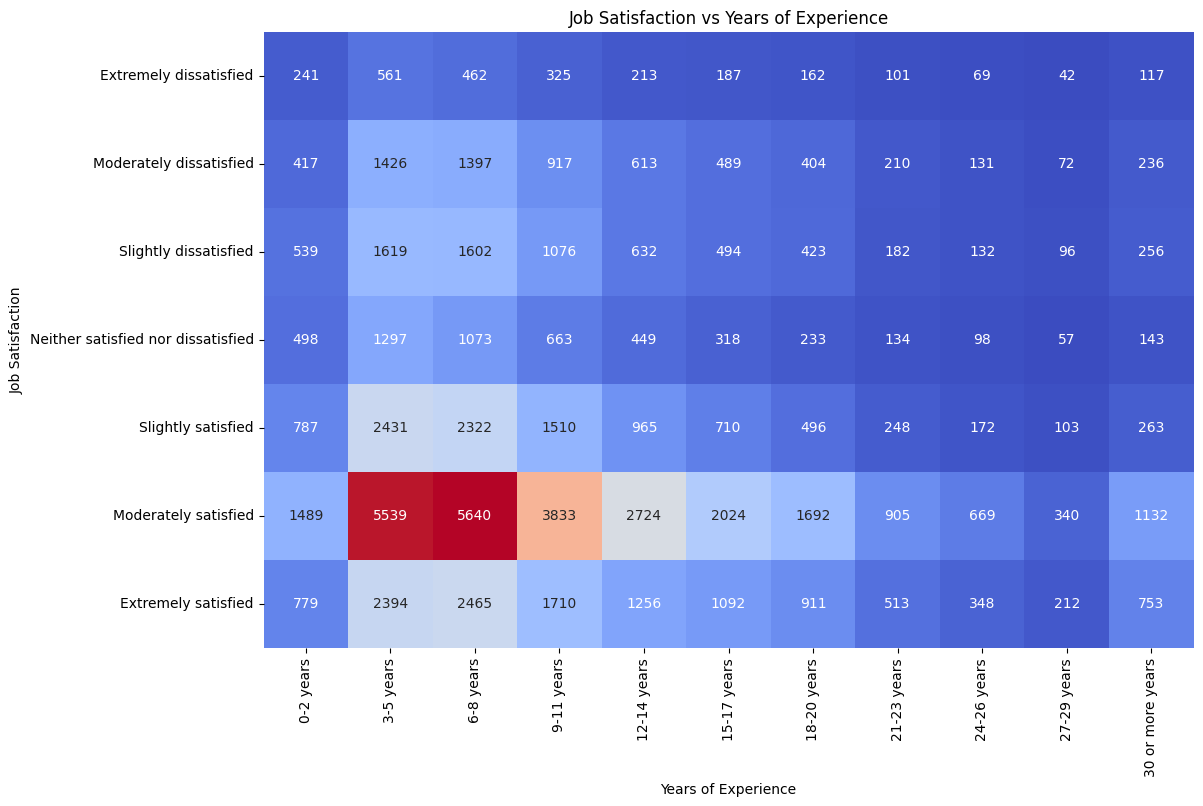

In [ ]:
from scipy.stats import chi2_contingency

# Select relevant columns
selected_columns = ['JobSatisfaction', 'YearsCoding']
subset_data = data_df[selected_columns]

# Define the custom order for 'YearsCoding'
years_coding_order = [
    '0-2 years', '3-5 years', '6-8 years', '9-11 years',
    '12-14 years', '15-17 years', '18-20 years', '21-23 years',
    '24-26 years', '27-29 years', '30 or more years'
]

# Define the custom order for 'JobSatisfaction'
job_satisfaction_order = [
    'Extremely dissatisfied', 'Moderately dissatisfied', 'Slightly dissatisfied',
    'Neither satisfied nor dissatisfied', 'Slightly satisfied', 'Moderately satisfied', 'Extremely satisfied'
]

# Create a contingency table without margins
contingency_table = pd.crosstab(subset_data['JobSatisfaction'], subset_data['YearsCoding'])

# Calculate Cramér's V statistic
chi2, p, _, _ = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
v = max(0, (chi2 / n - 1) / (min(contingency_table.shape) - 1))**0.5

# Display the contingency table and Cramér's V statistic
print("Contingency Table:")
print(contingency_table)
print("\nCramér's V Statistic:", v)

# Create a heatmap to visualize the relationship with ordered 'YearsCoding' and 'JobSatisfaction'
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table.loc[job_satisfaction_order, years_coding_order], annot=True, cmap='coolwarm', fmt='d', cbar=False)
plt.title('Job Satisfaction vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Job Satisfaction')
plt.show()



A Cramer's V statistic of 0 suggests a very weak or negligible association between job satisfaction and years of coding based on the analyzed data. This indicate that, according tot he statistical test applied, there is little evidence of a linear relationship or dependence between these two categorical variables. It's important to interpret this result cautiously and consider exploring other variables or conducting additional analyses to gain a more comprehensible understanding of the factors influencing job satisfaction among respondents in the survey. The lack of a strong association doesn't necessarity implay a lack of meaningful insights; it suggests that, based on the chosen variables, they might not be strongly correlated in a linear manner.

In [ ]:
#Extract unique values in 'CompanySize' column
unique_company_size_values = data_df['CompanySize'].unique()

#Display the unique values
print(unique_company_size_values)



['20 to 99 employees' '10,000 or more employees' '100 to 499 employees'
 '10 to 19 employees' '500 to 999 employees' '1,000 to 4,999 employees'
 '5,000 to 9,999 employees' 'Fewer than 10 employees' nan]


Cramér's V Statistic: 0.0


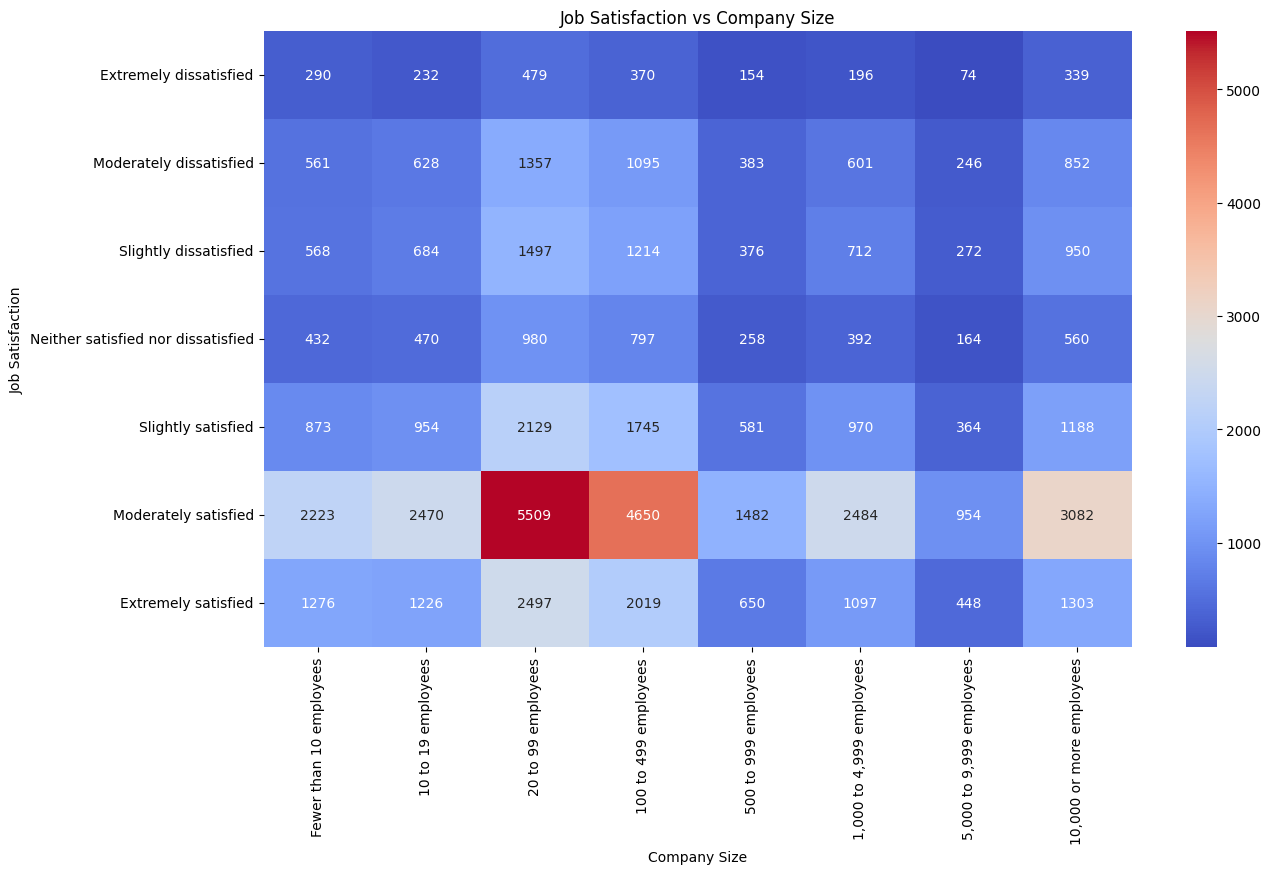

In [ ]:
# Select relevant columns
selected_columns = ['JobSatisfaction', 'CompanySize']
subset_data = data_df[selected_columns]

# Remove rows with missing values in 'JobSatisfaction' and 'CompanySize'
subset_data = subset_data.dropna(subset=['JobSatisfaction', 'CompanySize'])

# Order the categories for proper visualization
size_order = ['Fewer than 10 employees', '10 to 19 employees', '20 to 99 employees', '100 to 499 employees', '500 to 999 employees', '1,000 to 4,999 employees', '5,000 to 9,999 employees', '10,000 or more employees']

# Define the custom order for 'JobSatisfaction'
job_satisfaction_order = ['Extremely dissatisfied', 'Moderately dissatisfied', 'Slightly dissatisfied',
                           'Neither satisfied nor dissatisfied', 'Slightly satisfied', 'Moderately satisfied', 'Extremely satisfied']

# Create a contingency table
contingency_table = pd.crosstab(subset_data['JobSatisfaction'], subset_data['CompanySize'])

# Calculate Cramér's V statistic
chi2, _, _, _ = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
v = max(0, (chi2 / n - 1) / (min(contingency_table.shape) - 1))**0.5

# Display the Cramér's V statistic
print("Cramér's V Statistic:", v)

# Create a heatmap to visualize the relationship with ordered 'JobSatisfaction' and 'CompanySize'
plt.figure(figsize=(14, 8))
sns.heatmap(contingency_table.loc[job_satisfaction_order, size_order], annot=True, cmap='coolwarm', fmt='d', cbar=True)
plt.title('Job Satisfaction vs Company Size')
plt.xlabel('Company Size')
plt.ylabel('Job Satisfaction')
plt.show()


A Cramer's V correlation of 0 suggests a very weak or negligible association between job satisfaction and company size based on the analyzed data. This result indicates that according to the chosen statistical test, there is little evidence of a linear relationship or dependence between these two categorical variables. It's imporant to interpret this result cautiously and consider exploring other variables or conducting additional analyses to gain a more comprehesive understanding of the factors influencing job satisfaction among respondents in the survey. The lack of a strong assocation doesn't necessarily implay a lack of meaningful insights; it suggests that, based on the chosen variables, they might not be strongly correlated in a linear manner.

##**Salary and Compensation Questions**

##1.What is the distribution of salaries among developers in different countries?

We will only be doing distributions for the top 5 countries: United States, Germany, United Kingdom, India, and Canada.

<ipython-input-145-69e3dbd5efd6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_data_df['ConvertedSalary'] = us_data_df['ConvertedSalary'].clip(lower=us_salary_range[0], upper=us_salary_range[1])


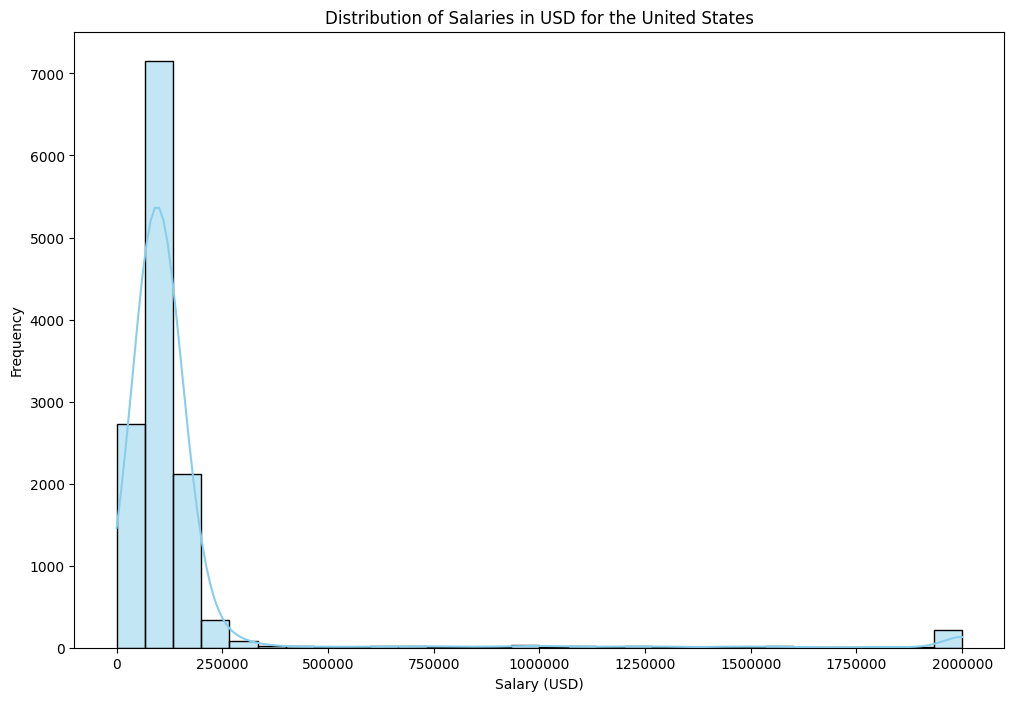

In [ ]:
# Filter data for the United States in data_df
us_data_df = data_df[data_df['Country'] == 'United States']

# Set the desired range to exclude outliers
us_salary_range = (us_data_df['ConvertedSalary'].quantile(0.01), us_data_df['ConvertedSalary'].quantile(0.99))

# Clip values outside the desired range
us_data_df['ConvertedSalary'] = us_data_df['ConvertedSalary'].clip(lower=us_salary_range[0], upper=us_salary_range[1])

# Plot the distribution of salaries in USD for the United States, centering the mean and excluding outliers
plt.figure(figsize=(12, 8))
sns.histplot(us_data_df['ConvertedSalary'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Salaries in USD for the United States')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')

# Set x-axis limits without scientific notation
plt.ticklabel_format(style='plain', axis='x')

plt.show()



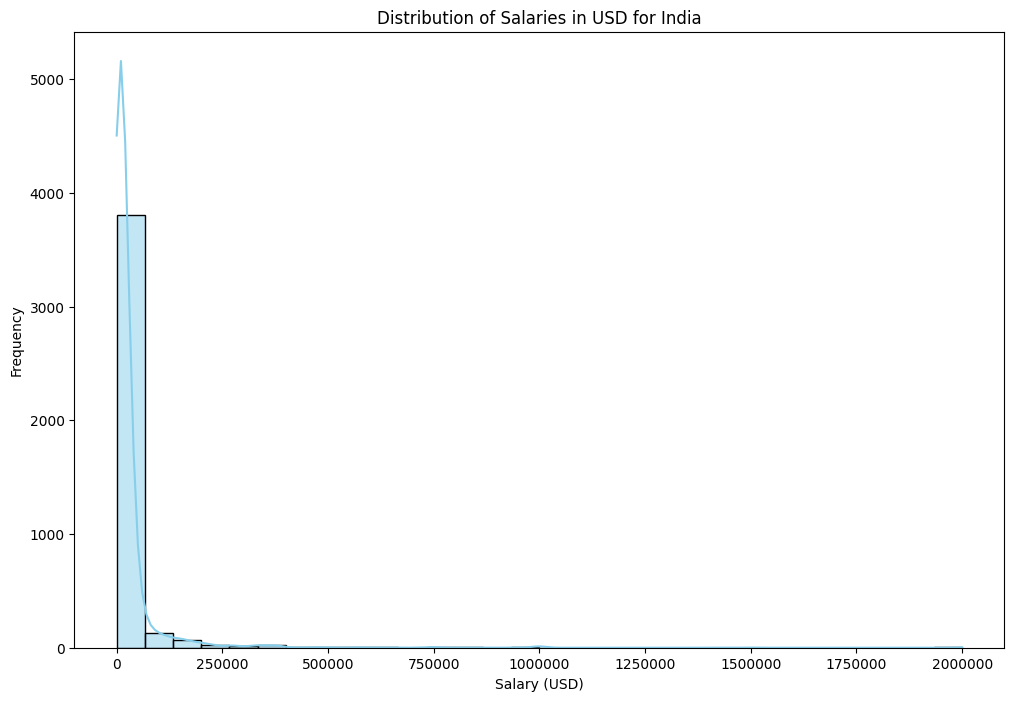

In [ ]:
#Filter data for India in data_df
india_data_df = data_df[data_df['Country'] =='India']

#Plot the distribution of salaries in USD for India
plt.figure(figsize=(12, 8))
sns.histplot(india_data_df['ConvertedSalary'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Salaries in USD for India')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show

#Show x-axis without scientific notation
plt.ticklabel_format(style='plain', axis='x')




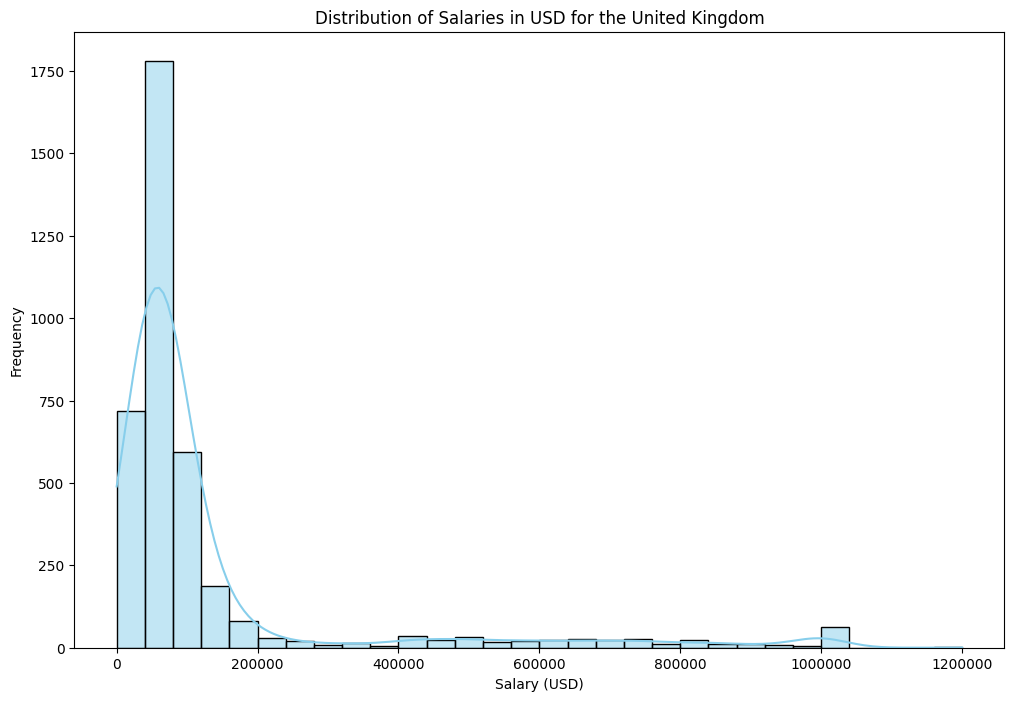

In [ ]:
#Filter data for United Kingdom in data_df
united_kingdom_data_df = data_df[data_df['Country'] == 'United Kingdom']

#Plot the distribution of salaries in USD for United Kingdom
plt.figure(figsize=(12, 8))
sns.histplot(united_kingdom_data_df['ConvertedSalary'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Salaries in USD for the United Kingdom')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show

#Show x-axis without scientific notation
plt.ticklabel_format(style='plain', axis='x')

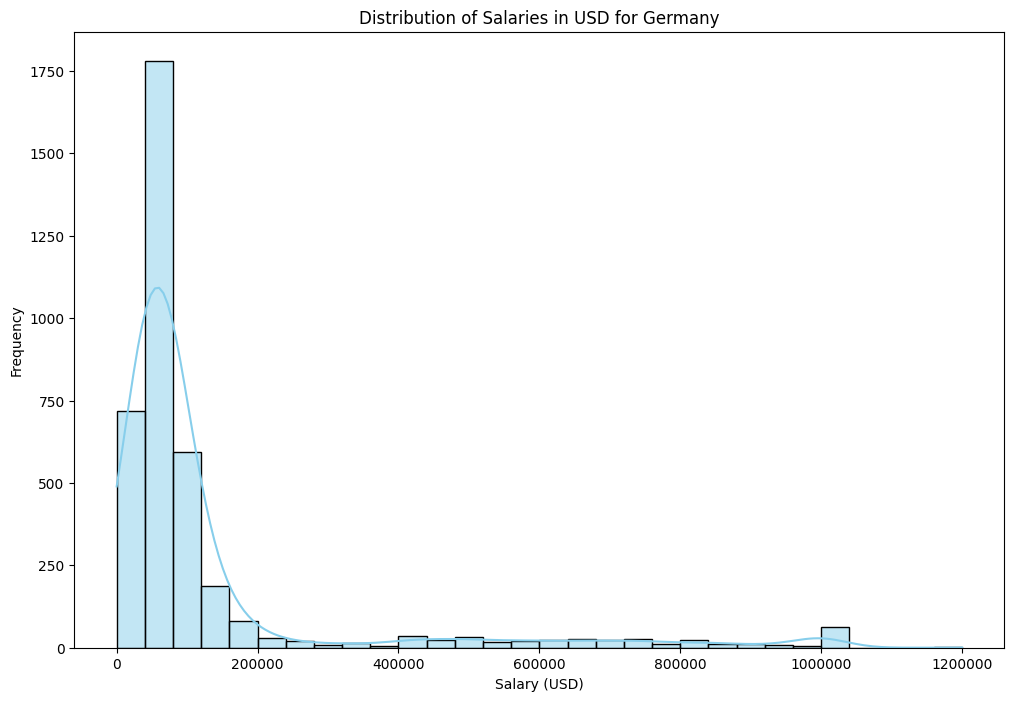

In [ ]:
#Filter data for Germany in data_df
germany_data_df = data_df[data_df['Country'] == 'Germany']

#Plot the distribution of salaries in USD for Germany
plt.figure(figsize=(12, 8))
sns.histplot(united_kingdom_data_df['ConvertedSalary'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Salaries in USD for Germany')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show

#Show x-axis without scientific notion
plt.ticklabel_format(style='plain', axis='x')




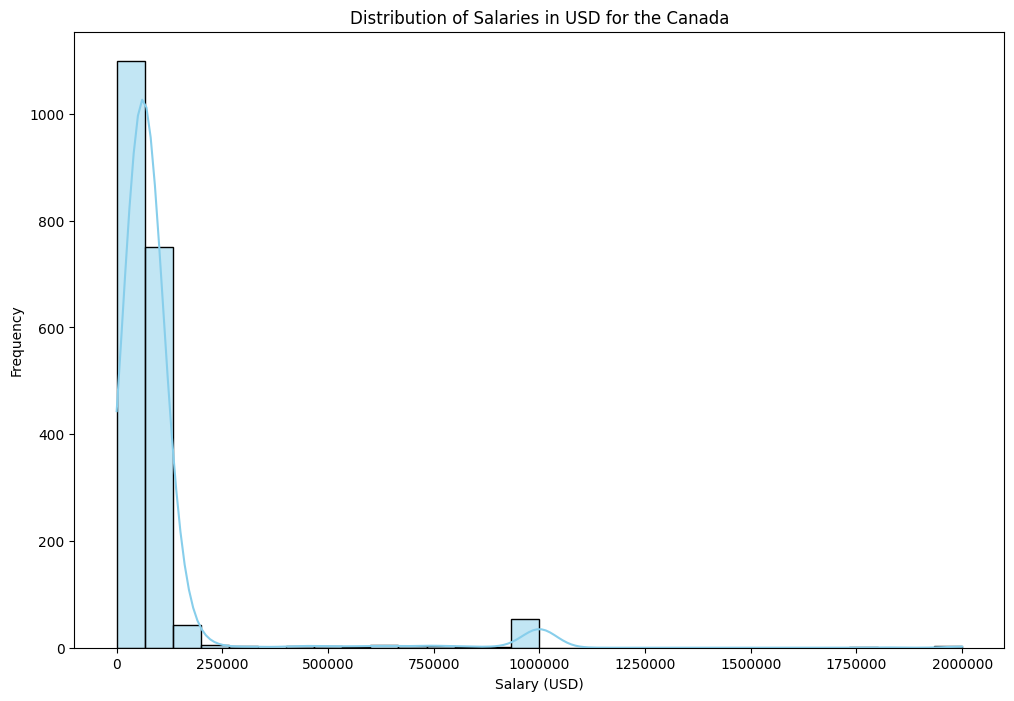

In [ ]:
#Filter data for Canada in data_df
canada_data_df = data_df[data_df['Country'] == 'Canada']

#Plot the distribution of salaries in USD for United Kingdom
plt.figure(figsize=(12, 8))
sns.histplot(canada_data_df['ConvertedSalary'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Salaries in USD for the Canada')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show

#Show x-axis without scientific notation
plt.ticklabel_format(style='plain', axis='x')

##2. How does salary vary based on education level and years of experience?

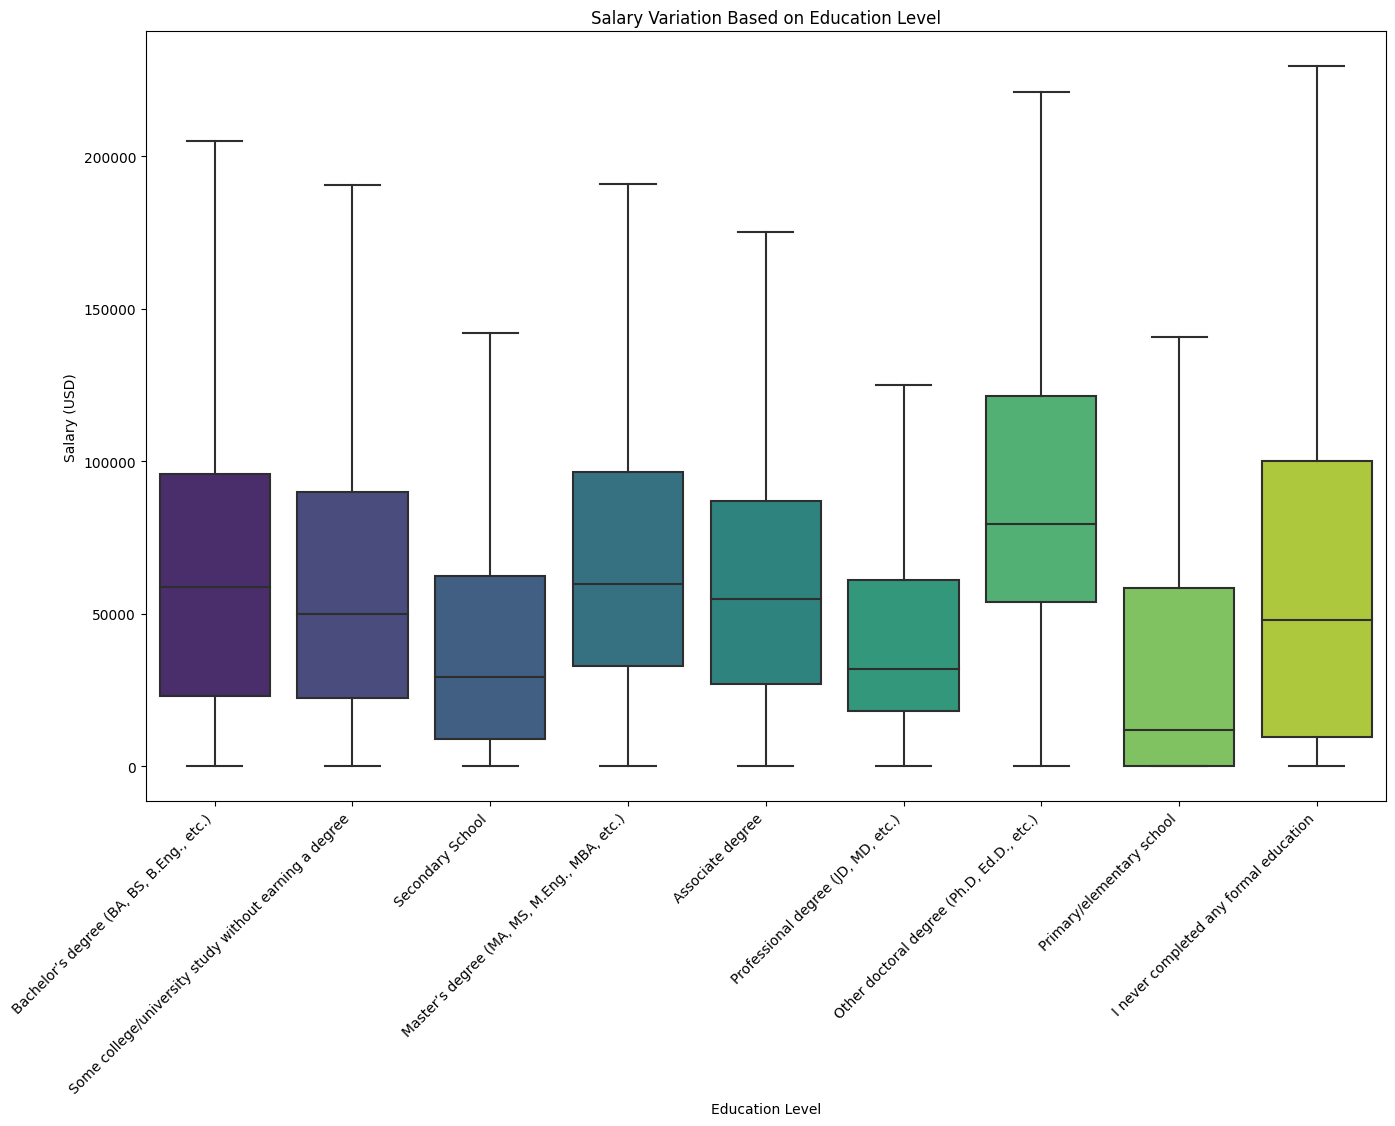

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for respondents with non-null education level and salary
education_salary_data = data_df[data_df['FormalEducation'].notnull() & data_df['ConvertedSalary'].notnull()]

# Plot boxplot to show salary variation based on education level
plt.figure(figsize=(16, 10))
ax = sns.boxplot(x='FormalEducation', y='ConvertedSalary', data=education_salary_data, palette='viridis', showfliers=False)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Salary Variation Based on Education Level')
plt.xlabel('Education Level')
plt.ylabel('Salary (USD)')

# Format y-axis labels without scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.show()




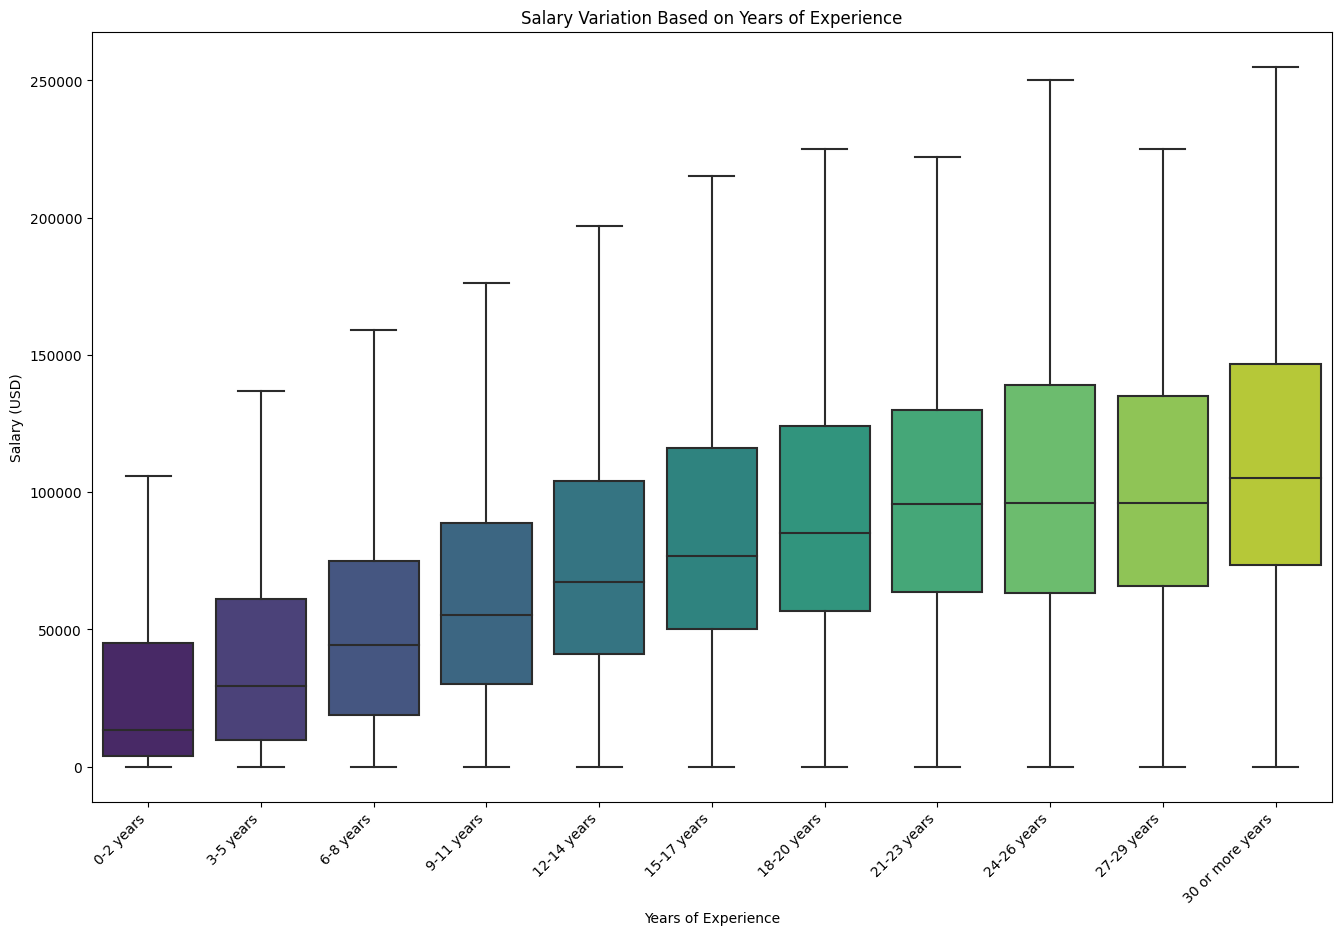

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for respondents with non-null years of experience and salary
experience_salary_data = data_df[data_df['YearsCoding'].notnull() & data_df['ConvertedSalary'].notnull()]

# Define the order for x-axis categories (years of experience)
experience_order = [
    '0-2 years', '3-5 years', '6-8 years', '9-11 years',
    '12-14 years', '15-17 years', '18-20 years', '21-23 years',
    '24-26 years', '27-29 years', '30 or more years',
]

# Plot boxplot to show salary variation based on years of experience
plt.figure(figsize=(16, 10))
ax = sns.boxplot(x='YearsCoding', y='ConvertedSalary', data=experience_salary_data, order=experience_order, palette='viridis', showfliers=False)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Salary Variation Based on Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (USD)')

# Format y-axis labels without scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.show()


##What is the relationship between salary and job satisfaction?

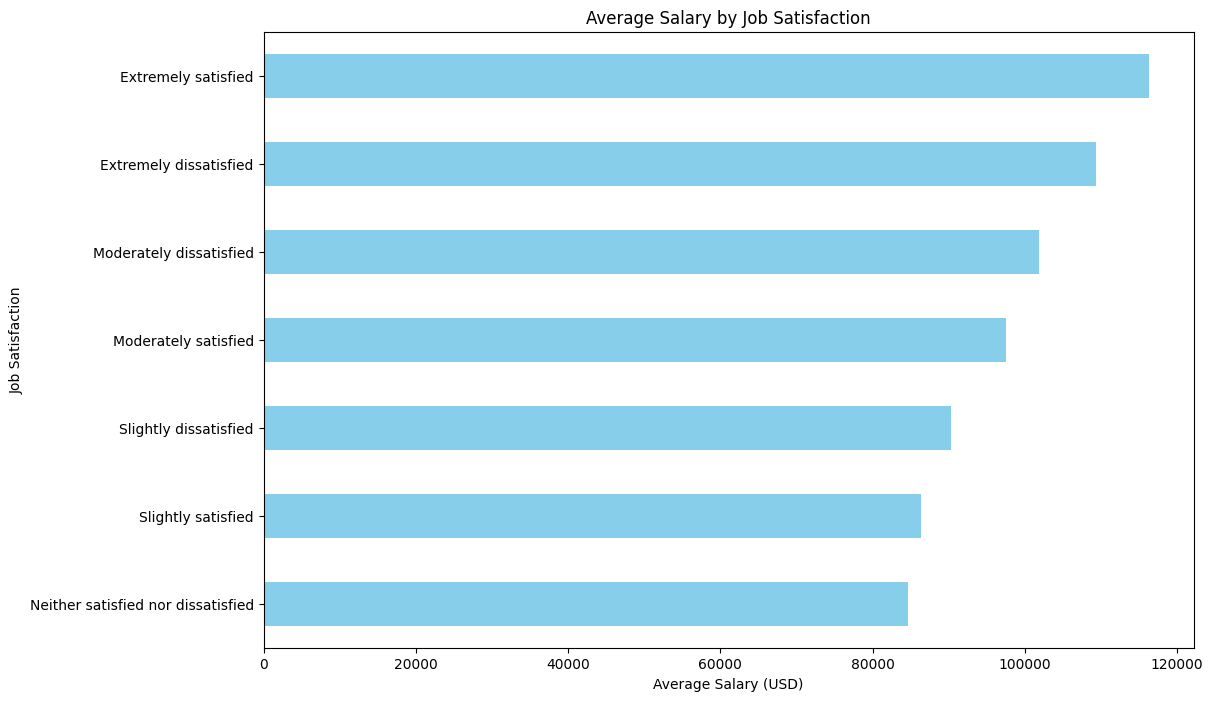

In [ ]:
# Filter data for respondents with non-null job satisfaction and salary
salary_satisfaction_data = data_df[data_df['JobSatisfaction'].notnull() & data_df['ConvertedSalary'].notnull()]

# Calculate the average salary for each job satisfaction level
average_salary_by_satisfaction = salary_satisfaction_data.groupby('JobSatisfaction')['ConvertedSalary'].mean().sort_values(ascending=True)

# Create a bar plot
plt.figure(figsize=(12, 8))
average_salary_by_satisfaction.plot(kind='barh', color='skyblue')
plt.title('Average Salary by Job Satisfaction')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Satisfaction')

# Format x-axis labels without scientific notation
plt.ticklabel_format(style='plain', axis='x')

plt.show()



The bar chart illustrates a positive correlation between salary and job satisfaction. As average salary increases, job satisfaction tends to rise as well. This suggests a notable relationship between these two variables, indicating that high compensation levels are assocated with increased levels of job satisfaction among survey respondents.

##**Technology and Tools Questions**

##1. What is the correlation between usage of specific technologies and job satisfaction?

In [ ]:
# Split the 'LanguageWorkedWith' column into a list of programming languages
data_df['LanguageList'] = data_df['LanguageWorkedWith'].str.split(';')

# Create a new DataFrame with each programming language and job satisfaction
language_satisfaction_df = data_df.explode('LanguageList')[['JobSatisfaction', 'LanguageList']]

# Remove rows with missing values in 'JobSatisfaction'
language_satisfaction_df = language_satisfaction_df.dropna(subset=['JobSatisfaction'])

# Create a contingency table
contingency_table = pd.crosstab(language_satisfaction_df['JobSatisfaction'], language_satisfaction_df['LanguageList'])

# Calculate Cramér's V statistic
chi2, _, _, _ = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
v = max(0, (chi2 / n - 1) / (min(contingency_table.shape) - 1))**0.5

# Display the Cramér's V statistic
print("Cramér's V Statistic:", v)


Cramér's V Statistic: 0.0


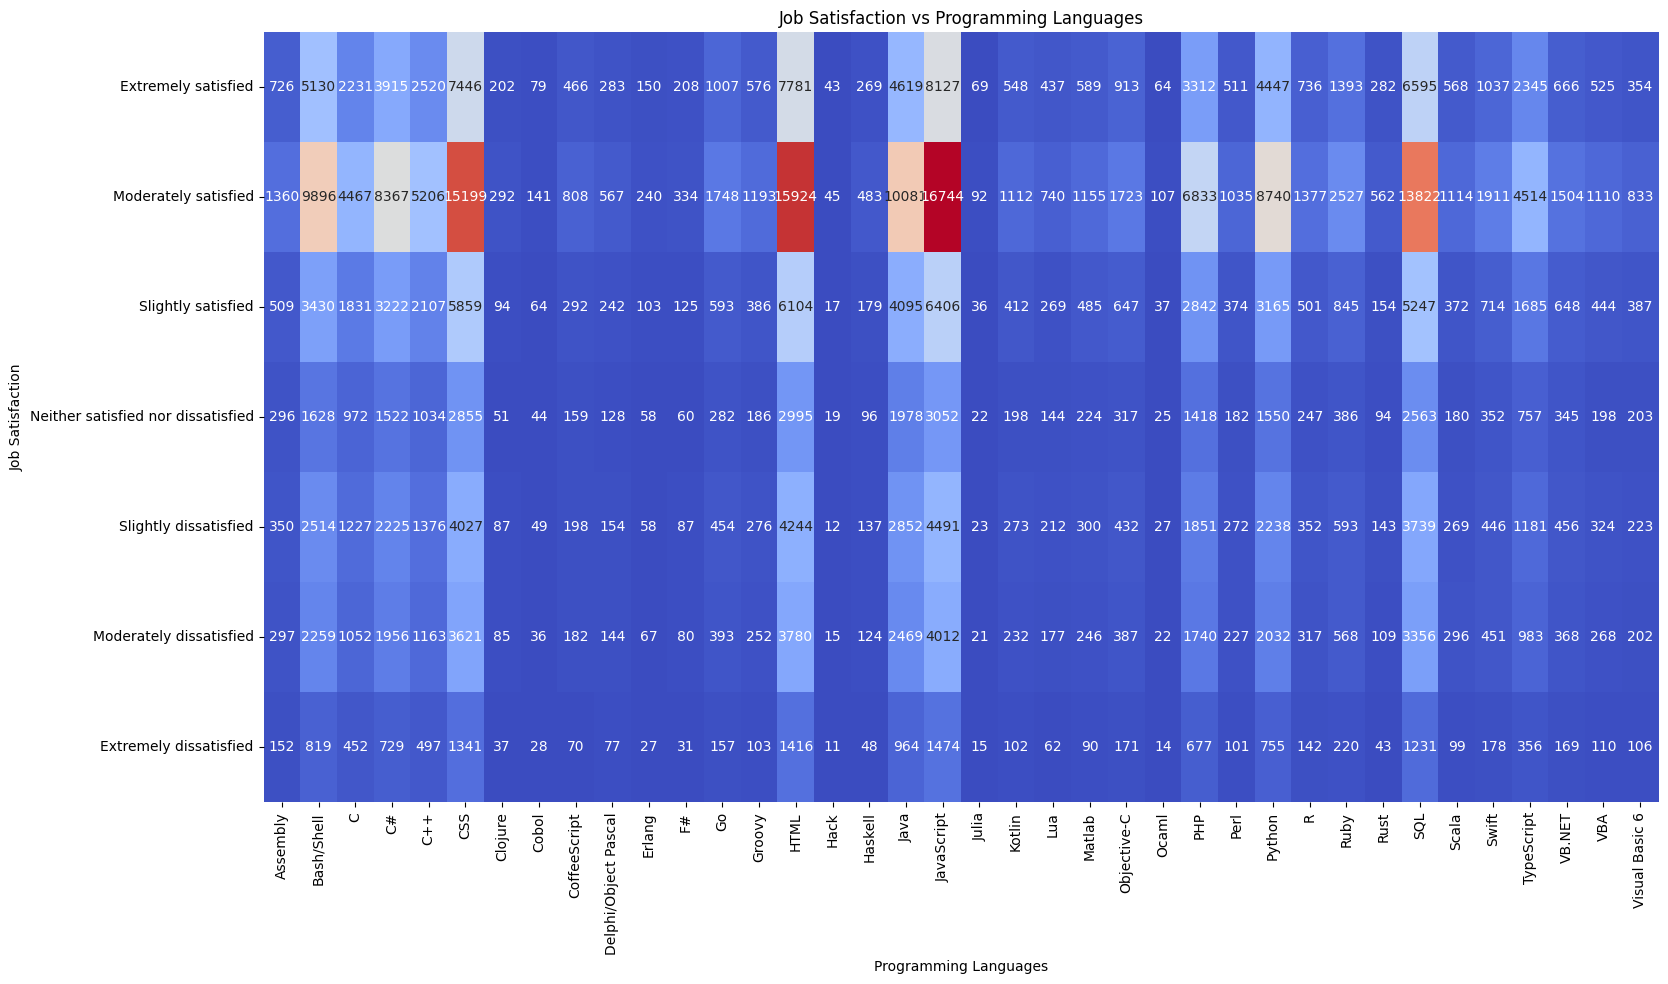

In [ ]:
# Reverse the order of satisfaction levels
reversed_satisfaction_order = satisfaction_order[::-1]

# Create a heatmap to visualize the relationship between programming languages and job satisfaction
plt.figure(figsize=(18, 10))
sns.heatmap(contingency_table.loc[reversed_satisfaction_order], cmap='coolwarm', annot=True, fmt='d', cbar=False)
plt.title('Job Satisfaction vs Programming Languages')
plt.xlabel('Programming Languages')
plt.ylabel('Job Satisfaction')
plt.show()



A Cramer's V statistic of 0 indicates a very weak or negligible association between programming languages and job satisfaction levels. In order words, there doesn't appear to be a substantial relationship between the choice of programming languages and the reported job satisfaction among survey respondents.


##2. How does the frequency of using version control systems vary among developers?

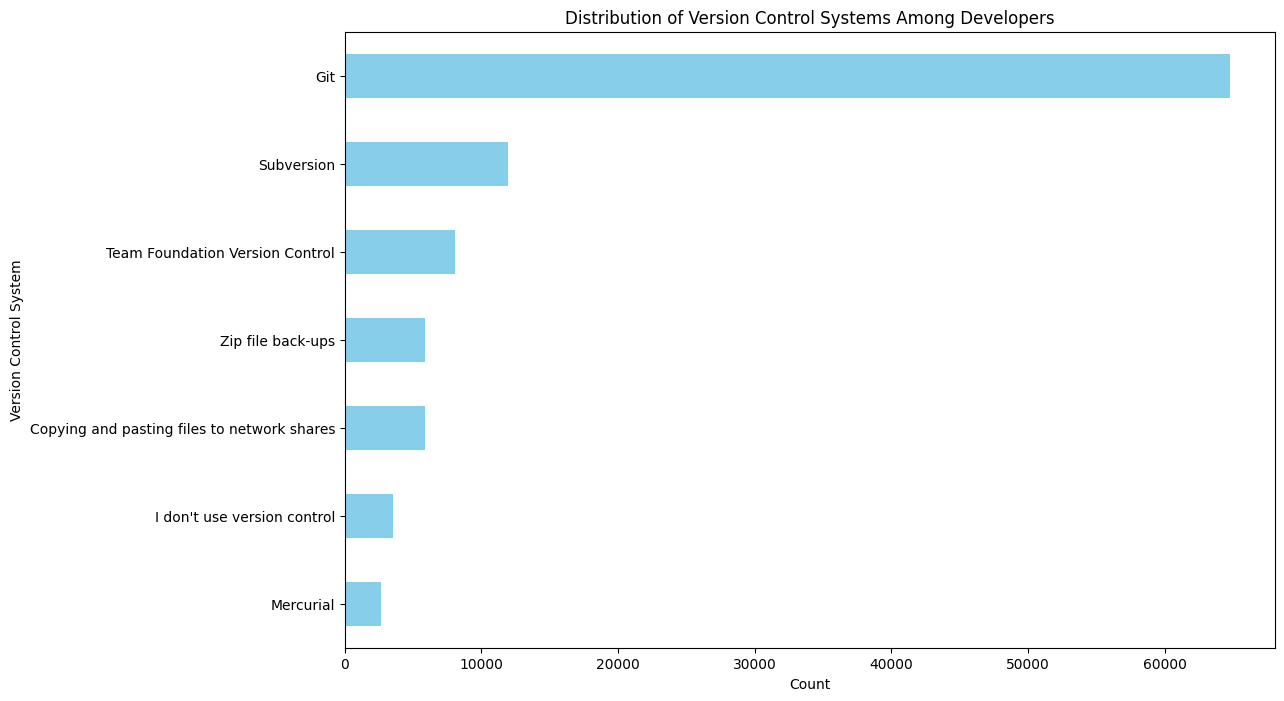

In [ ]:
#Split the 'VersionControl' column into a list of version vontrol systems
data_df['VersionControlList'] = data_df['VersionControl'].str.split(';')

#Create a new DataFrame with each version control system
version_control_df = data_df.explode('VersionControlList')['VersionControlList']

#Plot the distribution of version control systems
plt.figure(figsize=(12, 8))
version_control_df.value_counts().sort_values().plot(kind='barh', color='skyblue')
plt.title('Distribution of Version Control Systems Among Developers')
plt.xlabel('Count')
plt.ylabel('Version Control System')
plt.show()

The analysis of version control system usage among developers reveals that Git is the most widely adopted, with Subversion ranking second and Team Foundation Version Control (TFVC) in third place. This suggests a strong preference for distributed version control systems, particulary Git, within the developer community.

##**Learning and Skill Development**

##1. What are the most popular resources for learning new technologies or improving programming skills?

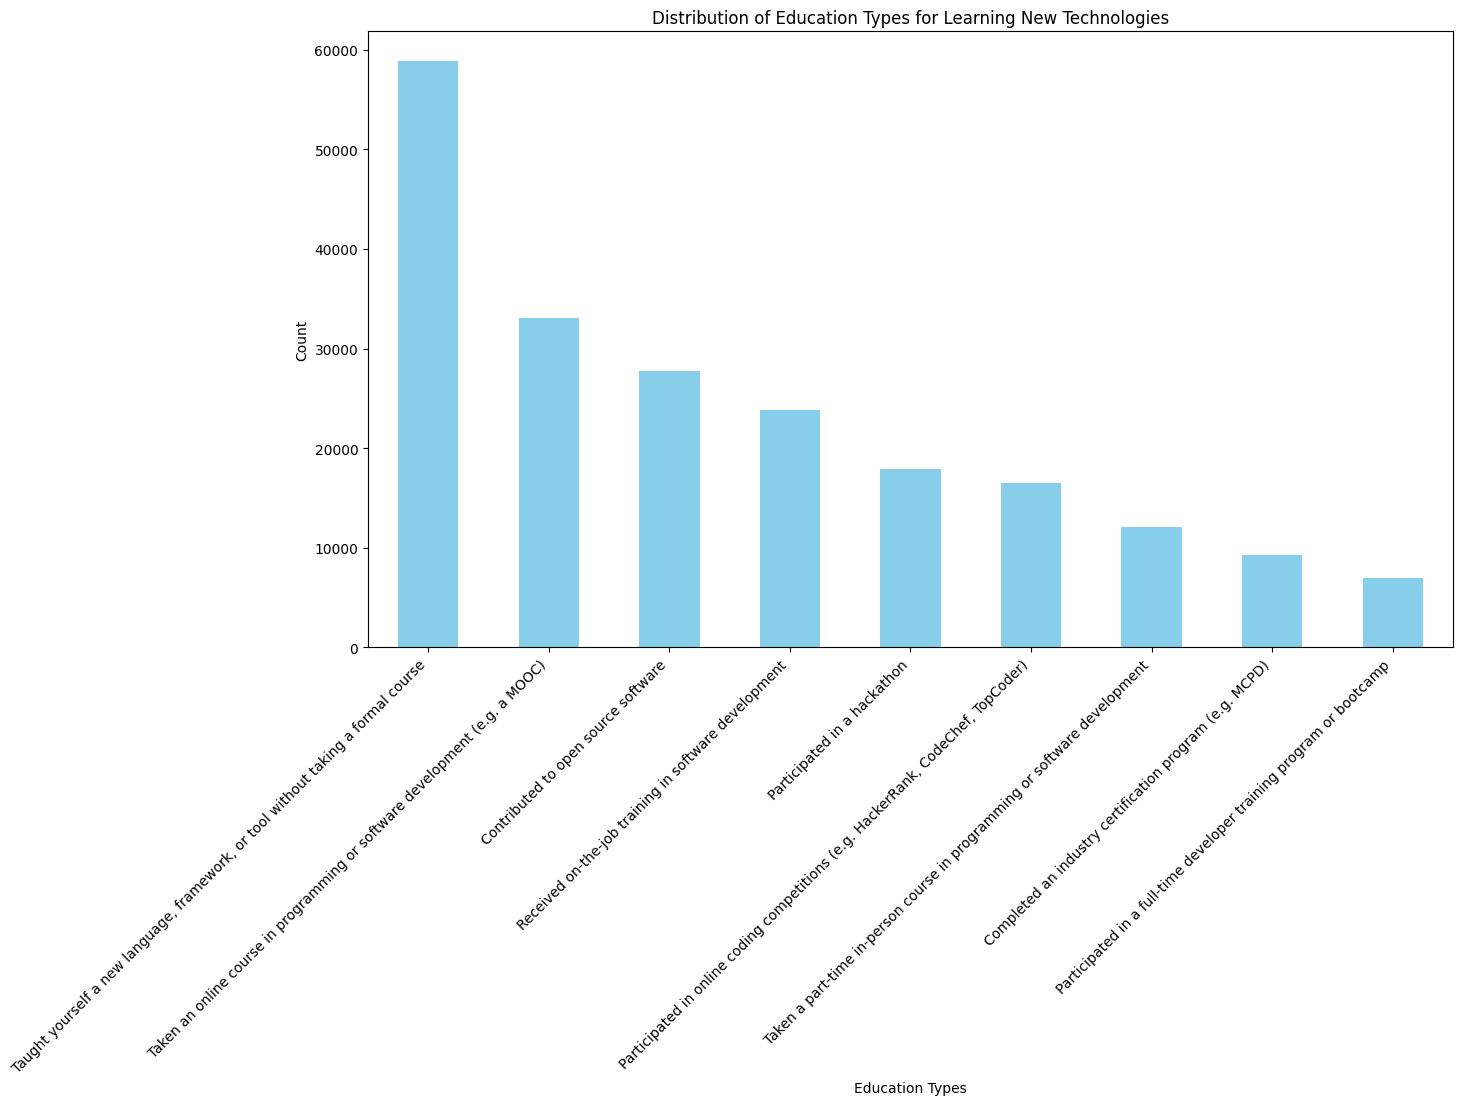

In [ ]:
#Split the 'EducationTypes' column into a list of education types
data_df['EducationList'] = data_df['EducationTypes'].str.split(';')

#Create a new DataFrame with each education type
education_types_df = data_df.explode('EducationList')['EducationList']

#Plot the distribution of education types
plt.figure(figsize=(14, 8))
education_types_df.value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Education Types for Learning New Technologies')
plt.xlabel('Education Types')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') #Rotate x-axis labels for better visibility
plt.show()

The survey results indicate that a significant number of respondents learned new programming languages without taking a formal course, emphasizing the importance of self-directed learning. Taking online courses emerged as the second most popular method, highlighting the increasing reliance on digital resources for skill development. Contributing to open source software ranked third, underlining the value developers place on hands-on, collaborative experiences to enhance their programming skills. These finding suggest a diverse range of learning preferences and underscore the significance of accessible online platofrms and real-world application in developer's education journeys.

##2. What incentivizes respondents to participate in hackathons?

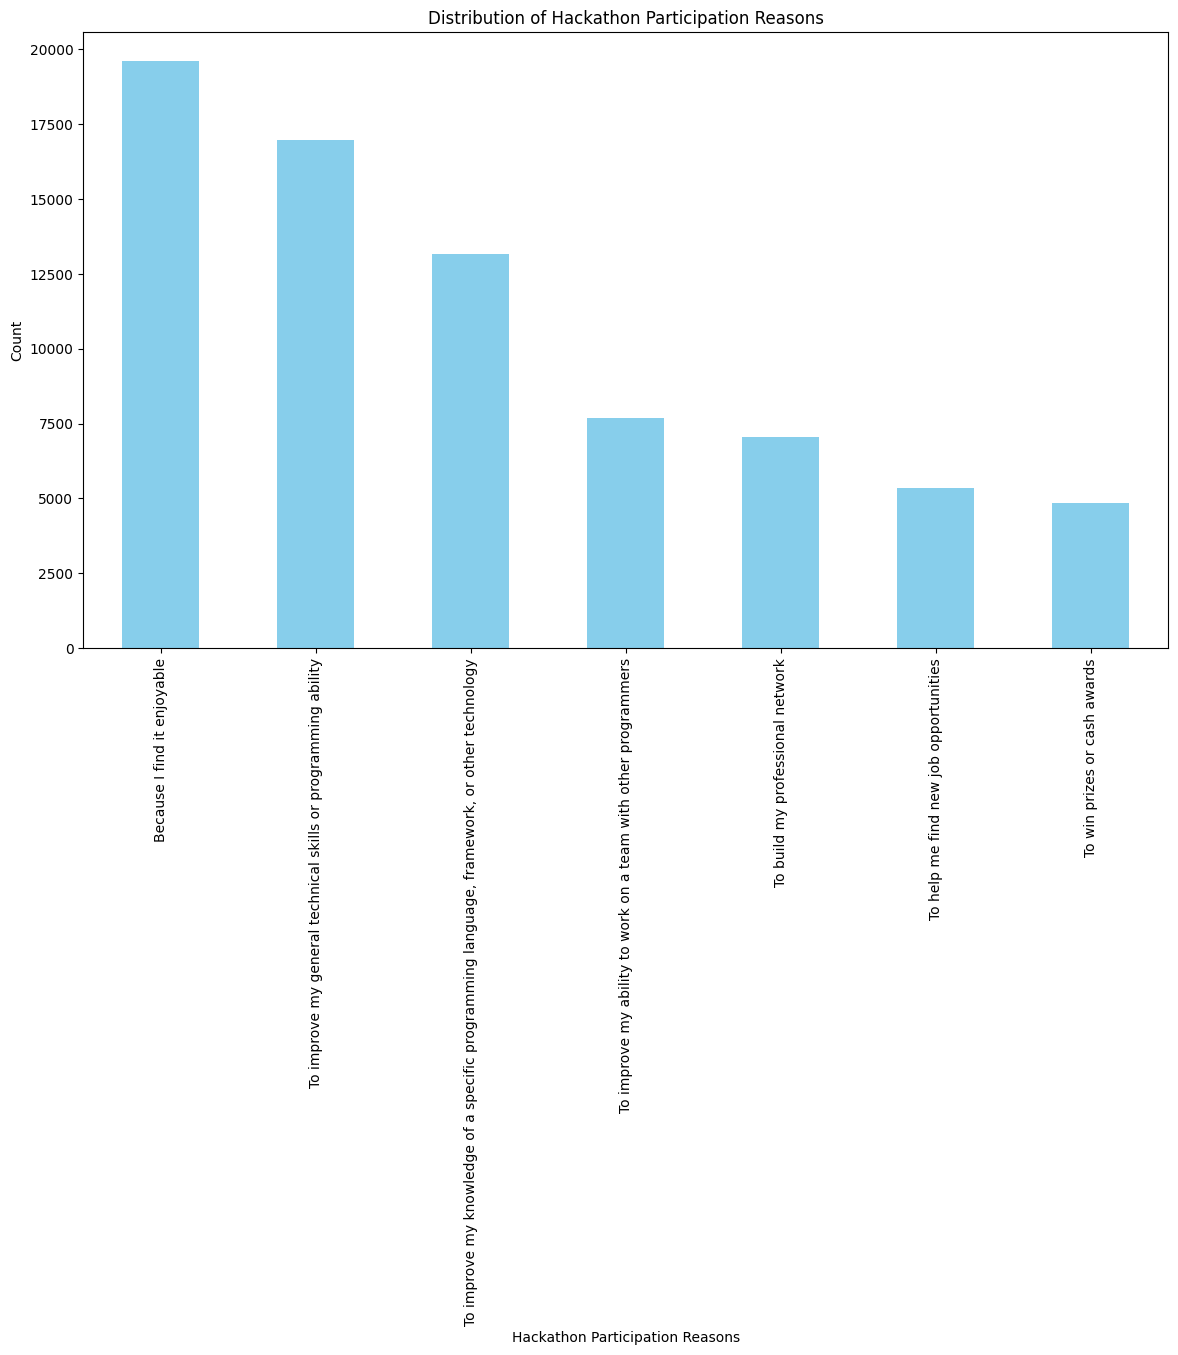

In [ ]:
#Split the 'HackathonReasonList' column into a list of reasons
data_df['HackathonReasonsList'] = data_df['HackathonReasons'].str.split(';')

#Create a new DataFrame with each reason and the count of the respondents
hackathon_reasons_df = data_df.explode('HackathonReasonsList')['HackathonReasonsList']

# Plot the distribution of hackathon participation reasons
plt.figure(figsize=(14, 8))
hackathon_reasons_df.value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Hackathon Participation Reasons')
plt.xlabel('Hackathon Participation Reasons')
plt.ylabel('Count')
plt.show()

##**Ethical and Diversity Questions**

##1. What is the distribution of ethnicity and gender among developers?

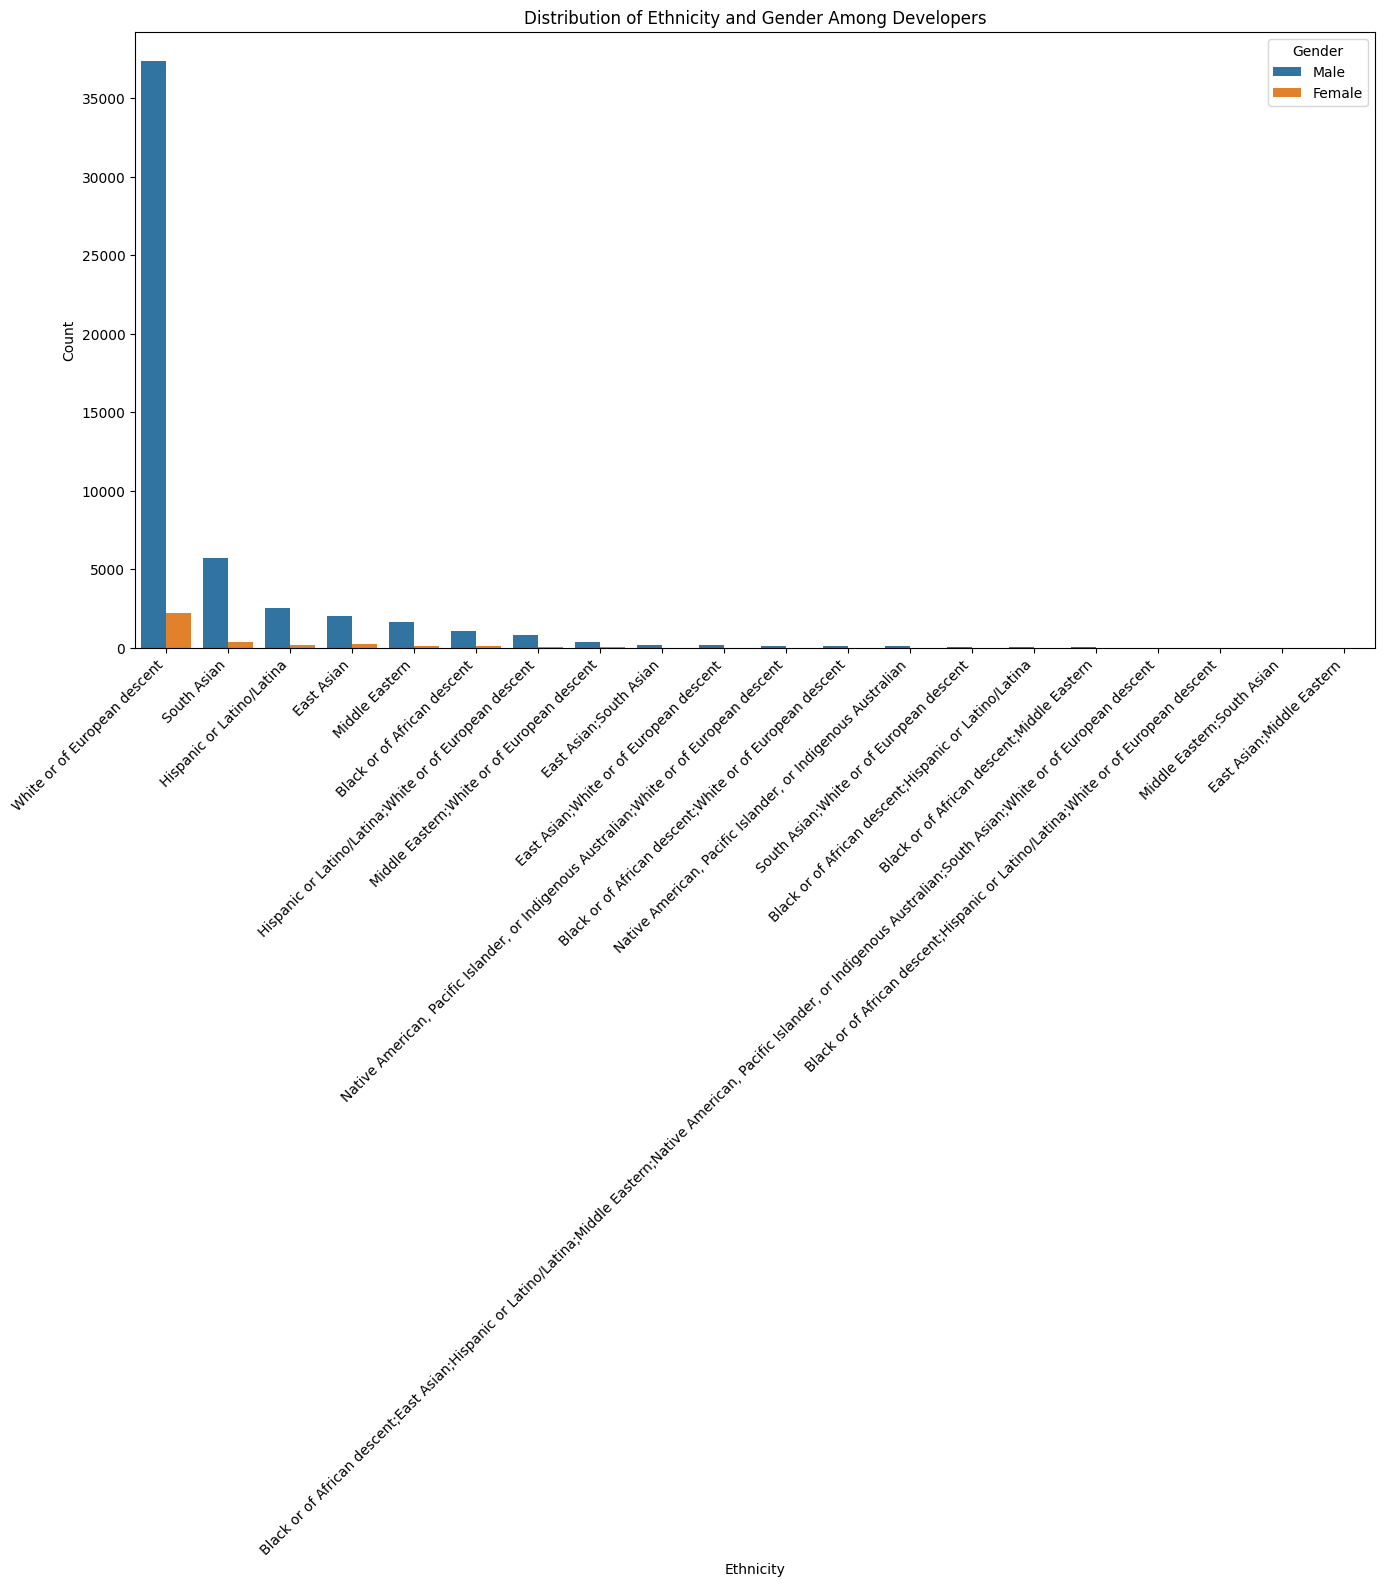

In [ ]:
# Filter data for male and female respondents
gender_data = data_df[data_df['Gender'].isin(['Male', 'Female'])]

# Select the top 20 ethnicities
top_ethnicities = gender_data['RaceEthnicity'].value_counts().nlargest(20).index

# Filter data for the selected ethnicities
filtered_data = gender_data[gender_data['RaceEthnicity'].isin(top_ethnicities)]

# Plot the distribution of ethnicity and gender among developers
plt.figure(figsize=(16, 8))
sns.countplot(x='RaceEthnicity', hue='Gender', data=filtered_data, order=top_ethnicities)
plt.title('Distribution of Ethnicity and Gender Among Developers')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.show()


In the top three ethnicities-White or European descent, South Asian, and Hispanic Latino-there is a noticeable gender imbalance among developers. Across these groups, there are considerably more male developers than female developers. This suggests a gender disparity within the devloper community, particulary in these prominent ethnic categories. Addressing and understanding these imbalances is crucial for fostering diversity and inclusivity in the field. It's essential to note that these observations are specific to the survey respondents and may not be reflective of the broader population.

##**Miscellaneous Questions**

##1. How does the level of job satisfaction vary based on the job role (e.g., developer, designer, data scientist)?


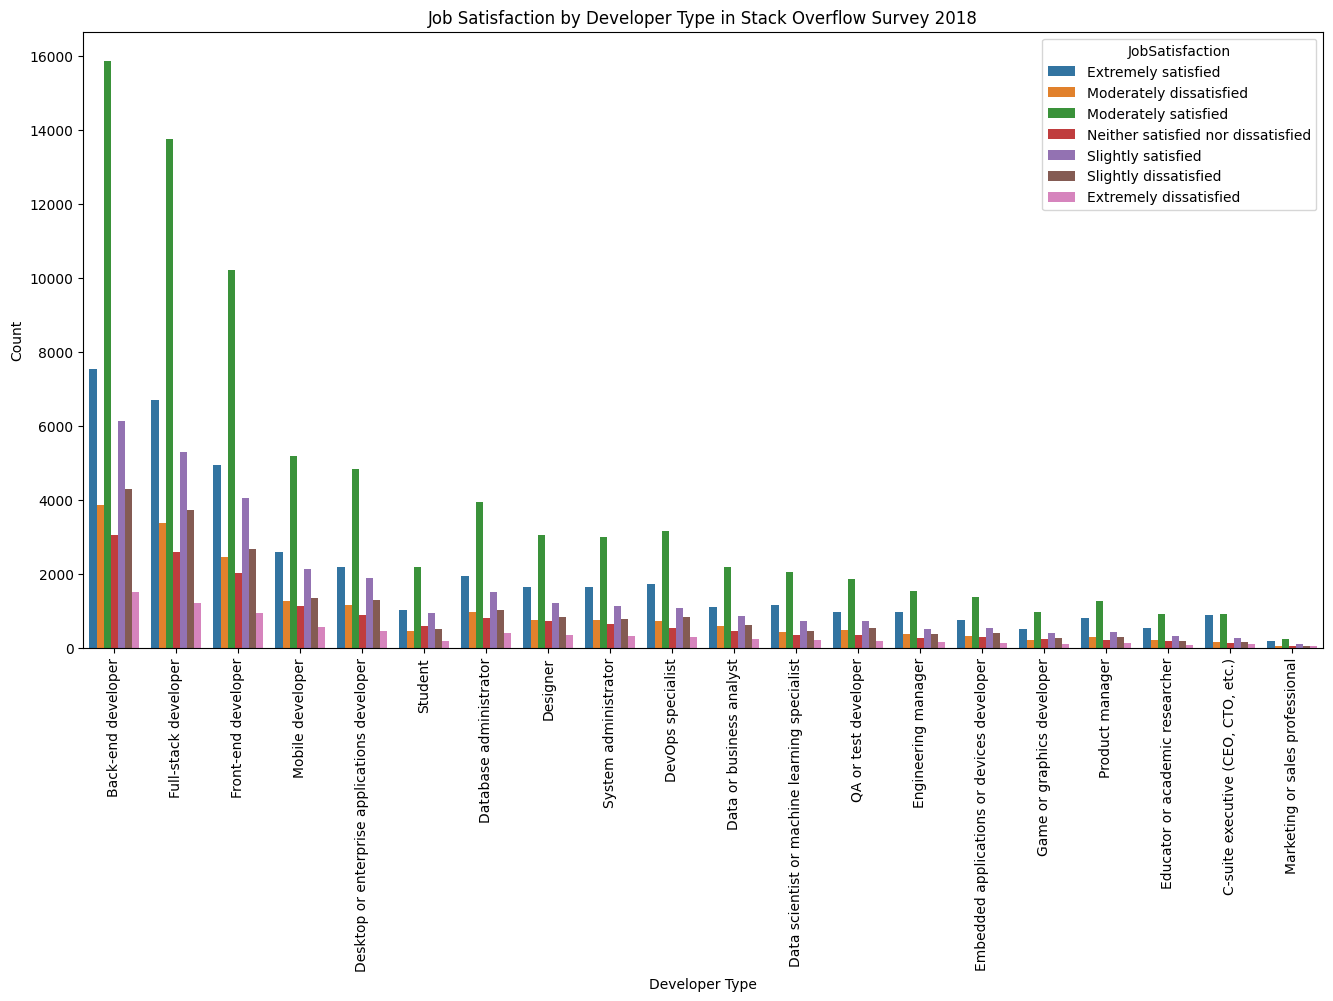

In [ ]:
# Split the 'DevType' column into a list of developer types
data_df['DevTypeList'] = data_df['DevType'].str.split(';')

# Create a new DataFrame with each developer type
dev_type_df = data_df.explode('DevTypeList')

# Plot the distribution of job satisfaction based on developer types
plt.figure(figsize=(16, 8))
sns.countplot(x='DevTypeList', hue='JobSatisfaction', data=dev_type_df, order=dev_type_df['DevTypeList'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Job Satisfaction by Developer Type in Stack Overflow Survey 2018')
plt.xlabel('Developer Type')
plt.ylabel('Count')
plt.show()



##2. What is the distribution of job tenure among developers, and does it influence job satisfaction?

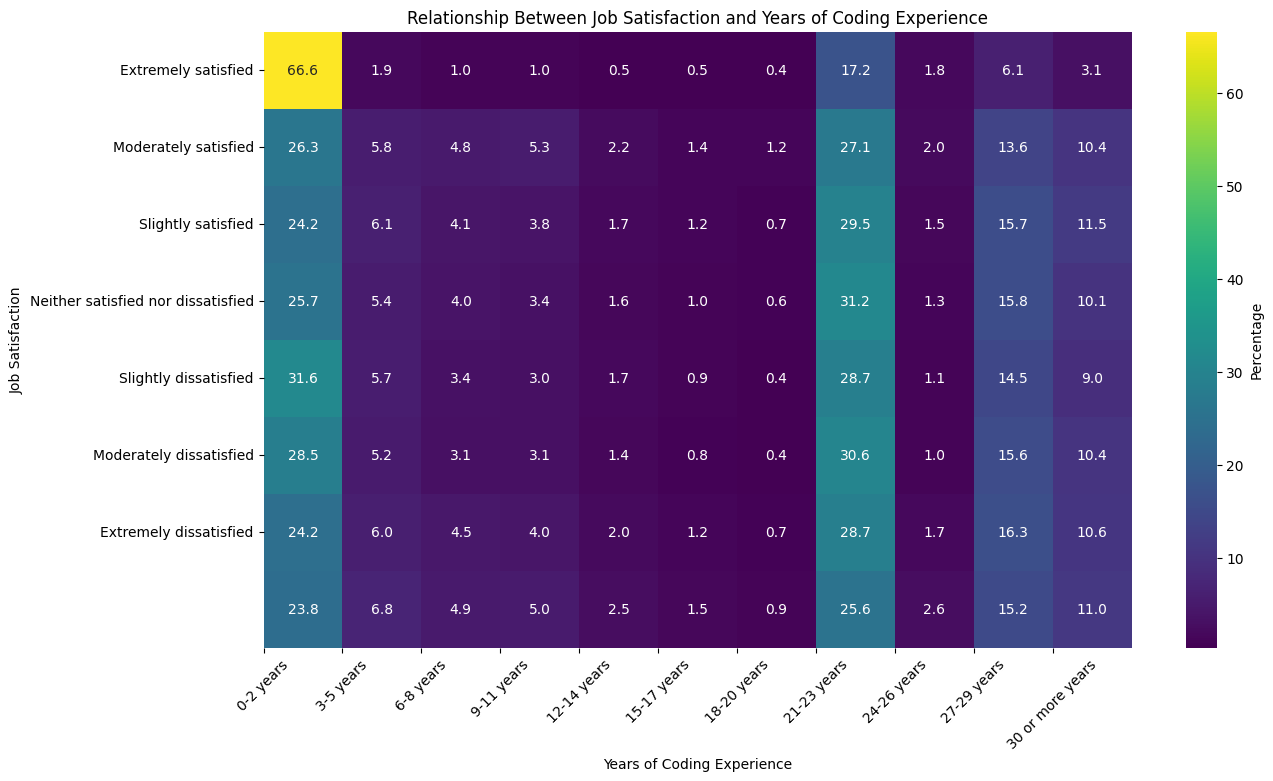

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a logical order for 'YearsCodingProf' and 'JobSatisfaction'
years_order = ['0-2 years', '3-5 years', '6-8 years', '9-11 years', '12-14 years', '15-17 years', '18-20 years', '21-23 years', '24-26 years', '27-29 years', '30 or more years']
satisfaction_order = ['Extremely dissatisfied', 'Moderately dissatisfied', 'Slightly dissatisfied', 'Neither satisfied nor dissatisfied', 'Slightly satisfied', 'Moderately satisfied', 'Extremely satisfied']

# Create a cross-tabulation of 'JobSatisfaction' and 'YearsCodingProf'
cross_tab = pd.crosstab(index=data_df['JobSatisfaction'], columns=data_df['YearsCodingProf'], normalize='index') * 100

# Plot a heatmap with reversed y-axis order
plt.figure(figsize=(14, 8))
sns.heatmap(cross_tab, annot=True, cmap='viridis', fmt='.1f', cbar_kws={'label': 'Percentage'}, yticklabels=satisfaction_order[::-1])
plt.title('Relationship Between Job Satisfaction and Years of Coding Experience')
plt.xlabel('Years of Coding Experience')
plt.ylabel('Job Satisfaction')
plt.xticks(ticks=range(len(years_order)), labels=years_order, rotation=45)
plt.show()

